## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shapefile as shp
from sklearn.linear_model import LinearRegression
from collections import Counter
import matplotlib.colors as colors_pyplot
plt.style.use('fivethirtyeight')
#%matplotlib inline

In [2]:
def posant_accents(it):
    
    if type(it) == str:
        
        ##lletra ç
        
        if '\x87' in it:
            nova = it.replace('\x87','ç')
        else:
            nova = it

        ###lletra i
        if '¡' or 'Ã¯'or 'ï'or 'Ã\xad'or 'í' in nova:
            renova = nova.replace('¡', 'i').replace('Ã¯', 'i').replace('ï', 'i').\
            replace('Ã\xad', 'i').replace('í', 'i')
        else:
            renova = nova
        ###Lletra o
        if '\x95' or 'Ã³' or '¢' or 'ã³'or 'Ã²' or 'ò' in renova:
            trinova = renova.replace('\x95', 'o').replace('Ã³', 'o')\
            .replace('¢', 'o').replace('ã³', 'o').replace('Ã²', 'o').replace('ò', 'o')
        else:
            trinova = renova

        if '¢' in trinova:

            quatrinova = trinova.replace('¢', 'o')
        else:
            quatrinova = trinova

        ###lletra e
        if '\x82' or 'Ã©' or 'é' or 'è'or 'Ãš' or '\x8a' in quatrinova:
            cinquinova = quatrinova.replace('\x82', 'e').replace('Ã©', 'e').replace('é', 'e').replace('è', 'e').\
            replace('Ãš', 'e').replace('\x8a', 'e')
        else:
            cinquinova = quatrinova

        if '\x85' or 'Ã\xa0'in cinquinova:
            sixinova = cinquinova.replace('\x85', 'a').replace('Ã\xa0', 'a').replace('à', 'a')
        else:
            sixinova = cinquinova

        if 'Sarr' in sixinova:

            septinova = 'Sarria'
        else:
            septinova = sixinova

        if 'Ã§' in septinova:
            vuitinova = septinova.replace('Ã§', 'ç')
        else:
            vuitinova = septinova

        ##Lletra u
        if 'ãº' or 'ú' or '£'in vuitinova:
            nounova = vuitinova.replace('ãº', 'u').replace('ú', 'u').replace('£','u')
        else:
            nounova = vuitinova

        if 'ã³' or 'ó' in nounova:

            deunova = nounova.replace('ã³', 'o').replace('ó', 'o')
        else:
            deunova = nounova
    else:
        deunova = it
    
    return deunova

def remove_accents(word):
    
    return word.replace('à', 'a').replace('è','e').replace('é', 'e').replace('ï', 'i').replace('í', 'i').replace('ò','o').replace('ó', 'o').replace('ü','u').replace('ú', 'u')


def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        print(a_set & b_set) 
    else: 
        print("No common elements")
        
def common_member_and_number(a,b):
    a_set = set(a) 
    b_set = set(b) 
    llista = []
    if (a_set & b_set): 
        llista = list(a_set & b_set) 
    return llista
    

# Tweaking Data

## DataFrames. Accidents

In [3]:
accidents = pd.read_csv('/Users/fcbnyc/mystuff/repos/BarcelonaAccidents/total_accidents_2018.csv',)
accidents.drop('Unnamed: 0', axis=1,inplace=True)
accidents.isnull().sum().sum()

date_columns = ['month_name', 'day_month', 'year']
date = accidents[date_columns]
dates = []
for i in date.itertuples():
    dates.append(i[1]+'/' +str(int(i[2]))+'/'+str(int(i[3])))
accidents['dates'] = dates
dates = accidents.groupby('dates').agg({'incident_#':'count', '#_deaths': 'sum'})

number_total_accidents = len(accidents)
number_total_deaths = int(accidents['#_deaths'].sum())
number_total_days = len(dates)
accidents['year'] = [int(x) for x in accidents['year']]
dataframe = pd.DataFrame(columns=['Question_1', 'Answer_1', "Question_2", "Answer_2"])
for i in range(0,20):
    if i <11:
        
        dataframe.at[1, 'Question_1'] = "Total deaths: "
        dataframe.at[1, 'Answer_1'] = str(number_total_deaths)
        dataframe.at[2,'Question_1'] = "Total accidents: "
        dataframe.at[2,'Answer_1'] = str(number_total_accidents)
        dataframe.at[3, 'Question_1'] = "Total days: "
        dataframe.at[3, 'Answer_1'] = str(number_total_days)
        dataframe.at[4, 'Question_1'] = 'Accidents per day:'
        dataframe.at[4, 'Answer_1']= round(number_total_accidents/number_total_days,2)
        dataframe.at[5, 'Question_1'] = 'Deaths per day:'
        dataframe.at[5, 'Answer_1'] =round(number_total_deaths/number_total_days,2)
        dataframe.at[6, 'Question_1'] = "Year with the highest number of accidents:"
        dataframe.at[6,'Answer_1'] = int(accidents.groupby('year')['incident_#'].count().sort_values(ascending=False).index[0])
        dataframe.at[7, 'Question_1']='Accidents: '
        dataframe.at[7,'Answer_1'] =accidents.groupby('year')['incident_#'].count().sort_values(ascending=False).values[0]
        dataframe.at[8,'Question_1'] = "Year with the highest number of deaths:"
        dataframe.at[8, 'Answer_1'] =int(accidents.groupby('year')['#_deaths'].sum().sort_values(ascending=False).index[0])
        dataframe.at[9,'Question_1'] = 'Deaths'
        dataframe.at[9,'Answer_1'] = int(accidents.groupby('year')['#_deaths'].sum().sort_values(ascending=False).values[0])
    else:
        dataframe.at[1, 'Question_2'] = "Month with the highest number of accidents:"
        dataframe.at[1, 'Answer_2'] = accidents.groupby(['year', 'month_name'])['incident_#'].count().sort_values(ascending=False).index[0]
        dataframe.at[2, 'Question_2'] = 'Accidents:'
        dataframe.at[2,'Answer_2'] =int(accidents.groupby(['year', 'month_name'])['incident_#'].count().sort_values(ascending=False).values[0])
        dataframe.at[3,'Question_2'] = "Month with the highest number of deaths:"
        dataframe.at[3,'Answer_2'] = accidents.groupby(['year', 'month_name'])['#_deaths'].sum().sort_values(ascending=False).index[0]
        dataframe.at[4,'Question_2'] = "Deaths: "
        dataframe.at[4,'Answer_2'] = int(accidents.groupby(['year', 'month_name'])['#_deaths'].sum().sort_values(ascending=False).values[0])
        dataframe.at[5, 'Question_2'] = "Day with the highest number of accidents:"
        dataframe.at[5,'Answer_2'] =accidents.groupby('dates')['incident_#'].count().sort_values(ascending=False).index[0]
        dataframe.at[6,'Question_2'] ="Accidents: "
        dataframe.at[6,'Answer_2'] = accidents.groupby('dates')['incident_#'].count().sort_values(ascending=False).values[0]
        dataframe.at[7, 'Question_2'] ="Day with the highest number of deaths:"
        dataframe.at[7, 'Answer_2'] = accidents.groupby('dates')['#_deaths'].sum().sort_values(ascending=False).index[0]
        dataframe.at[8, 'Question_2'] = "Deaths:"
        dataframe.at[8, 'Answer_2'] =int(accidents.groupby('dates')['#_deaths'].sum().sort_values(ascending=False).values[0])
        
dataframe.fillna('',inplace=True)
dataframe

,Question_1,Answer_1,Question_2,Answer_2
1,Total deaths:,241,Month with the highest number of accidents:,"(2017, November)"
2,Total accidents:,86686,Accidents:,991
3,Total days:,3287,Month with the highest number of deaths:,"(2011, August)"
4,Accidents per day:,26.37,Deaths:,8
5,Deaths per day:,0.07,Day with the highest number of accidents:,May/15/2015
6,Year with the highest number of accidents:,2017,Accidents:,55
7,Accidents:,10335,Day with the highest number of deaths:,August/30/2014
8,Year with the highest number of deaths:,2010,Deaths:,3
9,Deaths,39,,


## Plotting---TIME BASED FEATURES


1. Deaths/Accidents per YEAR.
2. Deaths/Accidents per MONTH.
3. Deaths/Accidents per WEEKDAY,
4. Daths/Accidents per WEEKEND. 
5. Deaths/Accidents per HOUR.
6. Deaths/Accidents per SHIFT


## 1. Deaths/Accidents per YEAR.

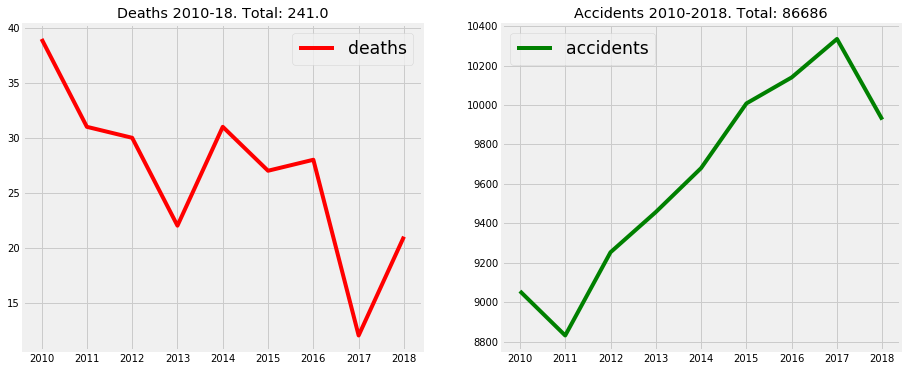

In [4]:
deads_per_year = accidents.groupby('year').sum()['#_deaths']
accidents_per_year = accidents.groupby('year').count()['incident_#']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

ax1.plot(deads_per_year, color='r', label ='Deaths_per_year')
ax2.plot(accidents_per_year, color='g', label='Accidents_per_year.')

ax1.set_title('Deaths 2010-18. Total: {}'.format(round(accidents['#_deaths'].sum(), 0)))
ax2.set_title('Accidents 2010-2018. Total: {}'.format(len(accidents)))
#plt.legend([ax1, ax2],["Deads", "Accidents"])
ax1.legend(["deaths"], fontsize ='xx-large')
ax2.legend(["accidents"], fontsize ='xx-large')


plt.savefig('./charts/accidents_deaths_per_year_2018.png');

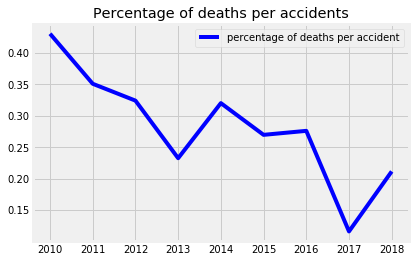

In [5]:
ratio = []
year = list(range(2010, 2019))
for x, z in zip(deads_per_year, accidents_per_year):
    ratio.append((x/z)*100)
#print(ratio)
plt.plot(year, ratio, color='blue', label='percentage of deaths per accident');
average_deads_per_accident = sum(ratio)/8
#plt.axhline(average_deads_per_accident, c='b', label='average of Deads per accident')
plt.legend()
plt.title('Percentage of deaths per accidents');
plt.savefig('./charts/avg_deaths_accident_per_year_2018.png');
### The ratio of deads per accident has been decrasing since 2010


## 2. Deaths/Accidents per month.

In [6]:
mes = accidents.groupby('month_name').agg({'#_deaths': 'sum','incident_#': 'count'})
mes = mes.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',\
'September', 'October', 'November','December'])
mes.columns = ['deaths', 'accidents']
mes.index = [x[0:3] for x in mes.index]

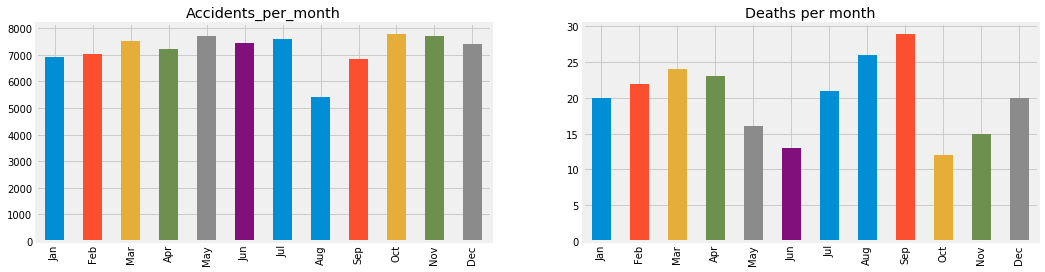

In [7]:
mes['ratio'] = mes['deaths']/mes['accidents']


fig, axes = plt.subplots(1,2, figsize=(16,4))


mes['accidents'].plot(kind='bar', ax=axes[0], title='Accidents_per_month');
#axes[0].tick_params(axis='y', labelsize=0, length = 0)
#style = dict(size=15, color='black')
# for month_ in range(0,12):
#     axes[0].text(mes_accidents.at[month_,'accidents'], month_,mes_accidents.at[month_,'month_name'] , **style)
# # axes[0].text(3500, 0, street_accidents.at[0,'street'][0:15], **style)
# street_deaths = dataframe.sort_values('deaths', ascending=False,).head(10).reset_index()
# street_deaths.rename(columns= {'index': 'street'}, inplace=True)
mes['deaths'].plot(kind='bar', ax=axes[1], title='Deaths per month');
# axes[1].tick_params(axis='y', labelsize=0, length = 0)


plt.savefig('./charts/accidents_deaths_per_month_2018.png', bbox_inches = 'tight');

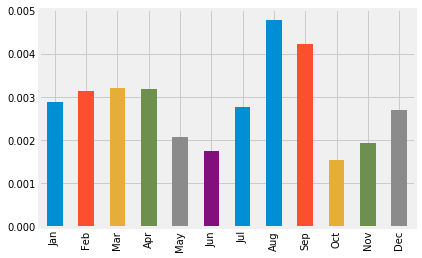

In [8]:
mes['ratio'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_deaths_per_month_2018.png', bbox_inches = 'tight');

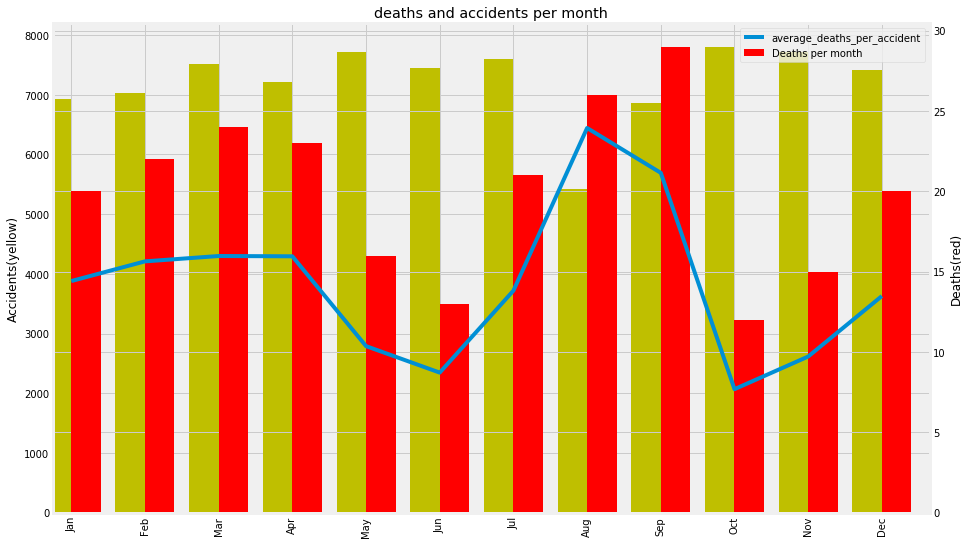

In [9]:
mes['average_deaths_per_accident'] = mes['ratio']*5000
#mes['average_target_per_accident'] = (mes['target']/mes['accidents_per_month'])*1000
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
#plt.bar(shift, accidents_per_shift, color ='r', ax=ax, width=width, position=1)
mes['accidents'].plot(kind='bar', color='y', ax=ax, width=width, position=1, label='Accidents per month')
mes['deaths'].plot(kind='bar', color='r', ax=ax2, width=width, position=0, label='Deaths per month')
#mes['average_target_per_accident'].plot(kind='line')
mes['average_deaths_per_accident'].plot(kind='line')
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
plt.title('deaths and accidents per month')
plt.legend()
plt.savefig('./charts/accidents_deaths_per_month2_2018.png');

###Summers are more dangerous

## 3. Deaths/Accidents per weekday.

In [10]:
setmana = accidents.groupby('weekday_name').agg({'incident_#': 'count', '#_deaths': 'sum'})
setmana = setmana.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
setmana.columns = ['accidents', 'deaths']
setmana.index = [x[0:3] for x in setmana.index]

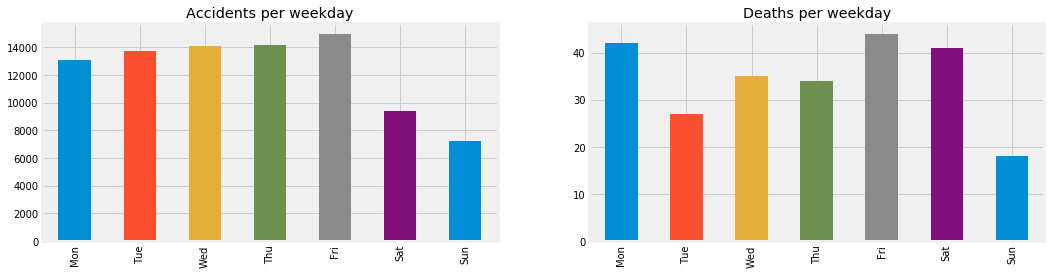

In [11]:
setmana['ratio'] = setmana['deaths']/ setmana['accidents']
#setmana['average_target'] = setmana['target']/ setmana['accidents_per_weekday']
fig, axes = plt.subplots(1,2, figsize=(16,4))
setmana['deaths'].plot(kind='bar',ax=axes[1], title='Deaths per weekday');
setmana['accidents'].plot(kind='bar', ax=axes[0], title='Accidents per weekday');
#mes['average'].plot(kind='bar', ax=axes[2]);


plt.savefig('./charts/accidents_deaths_per_weekday_2018.png', bbox_inches = 'tight');

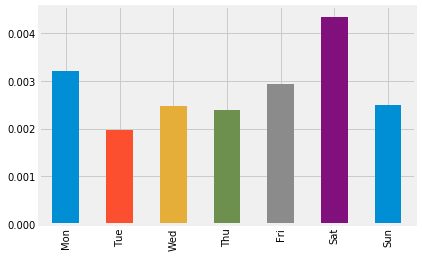

In [12]:
setmana['ratio'].plot(kind='bar')
plt.savefig('./charts/avg_accidents_deaths_per_weekday_2018.png');

## 4. Deaths/Accidents per weekend.

In [13]:
weekend = accidents.loc[accidents['weekday_name'].isin(['Friday', 'Saturday', 'Sunday', 'Monday']),\
              ['incident_#', '#_deaths', 'weekday_name', 'hour_day']].groupby(['weekday_name', 'hour_day']).agg\
({'incident_#': 'count', '#_deaths': 'sum'})

weekend= weekend.reindex(['Friday', 'Saturday', 'Sunday', 'Monday'], level=0)
for hour in range(0,13):
    weekend.drop(index=('Friday', hour),inplace=True)
for hour in range(13,24):
    weekend.drop(index=('Monday', hour),inplace=True)
weekend.columns =['number_of_accidents', 'number_of_deaths']

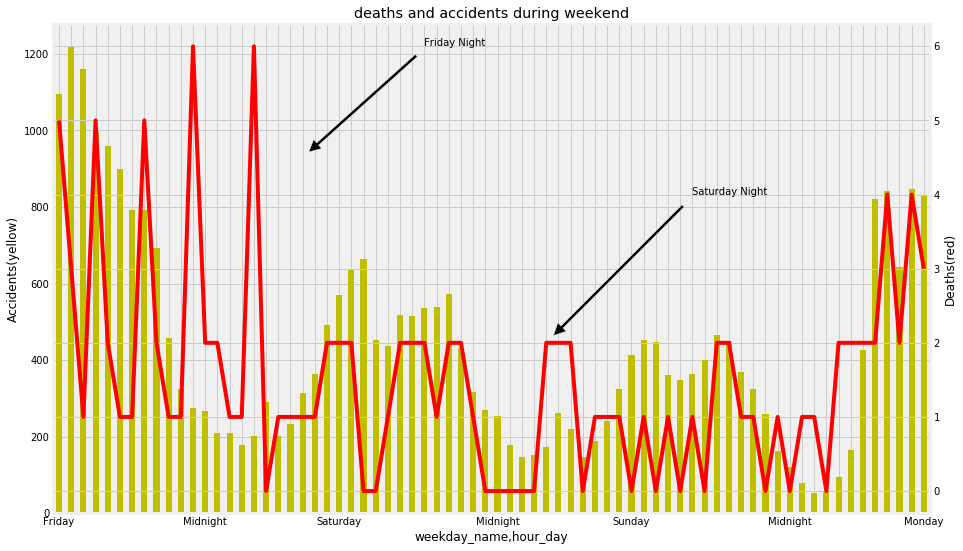

In [14]:
squad = ['' for x in range(0,72)]
for i in [12,36,60]:
    squad[i] = 'Midnight'
squad[0] = 'Friday'
squad[23] = 'Saturday'
squad[47] = 'Sunday'
squad[71] = 'Monday'
fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
weekend.plot(kind='bar', y='number_of_accidents', color='y', ax=ax, legend=False )#.legend(loc='best')
weekend.plot(kind='line', y='number_of_deaths', color='r', ax=ax2, legend=False)#.legend(loc='best')
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
ax.set_xticklabels(squad, rotation= 360)
plt.annotate('Friday Night', xy=(20, 4.5), xytext=(30, 6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.annotate('Saturday Night', xy=(40, 2), xytext=(52, 4),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )
plt.title('deaths and accidents during weekend')
#plt.legend(['Accidents', 'Deaths'],loc='best')
plt.savefig('./charts/accidents_deaths_per_weekendlong_2018.png'); 

## 5. Deaths/Accidents per hour of the day.


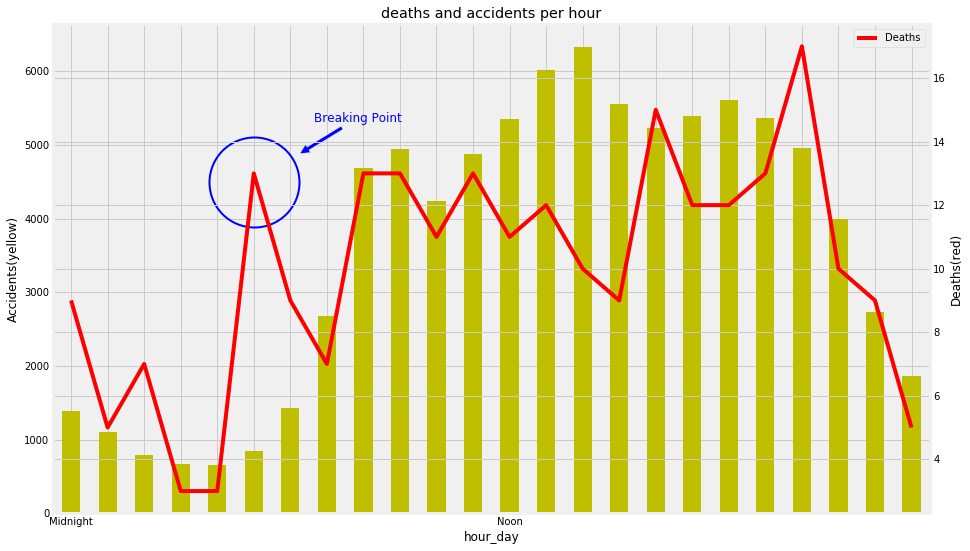

In [15]:
squad2 = []
for i in range(0,24):
    if i == 0:
        squad2.append('Midnight')
    elif i == 12:
        squad2.append('Noon')
    else:
        squad2.append('')

deaths_per_hour =  accidents.groupby('hour_day').sum()['#_deaths']
accidents_per_hour = accidents.groupby('hour_day').count()['incident_#']

fig = plt.figure(figsize=(14, 9)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
accidents_per_hour.plot(kind='bar', color='y', ax=ax, label='Accidents')
deaths_per_hour.plot(kind='line', color='r', ax=ax2, label='Deaths')
#plt.plot(weekend_reindex_accidents)
#plt.bar(shift, deads_per_shift, color='b', ax=ax2, position=0)
ax.set_ylabel('Accidents(yellow)')
ax2.set_ylabel('Deaths(red)')
ax.set_xticklabels(squad2, rotation= 360)
circle_rad = 45
point = (5, 4500)
ax.plot(point[0], point[1], 'o',
        ms=circle_rad * 2, mec='b', mfc='none', mew=2)
ax.annotate('Breaking Point', xy=point, xytext=(60, 60),
            textcoords='offset points',
            color='b', size='large',
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='b', shrinkB=circle_rad * 1.2)
)
plt.title('deaths and accidents per hour')
plt.legend()
plt.savefig('./charts/accidents_deaths_per_hour_2018.png'); 

In [16]:
weekly_hour = accidents.groupby(['weekday_name', 'hour_day'])['incident_#'].count().unstack('hour_day')
weekly_hour= weekly_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_hour['maxim_accidents'] = weekly_hour.max(axis=1)
weekly_hour['hour_maxim_accidents'] = weekly_hour.idxmax(axis=1)
weekday_hour_acc_death = pd.DataFrame(data= weekly_hour[['maxim_accidents', 'hour_maxim_accidents']])
weekly_hour = accidents.groupby(['weekday_name', 'hour_day'])['#_deaths'].sum().unstack('hour_day')
weekly_hour= weekly_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekly_hour['maxim_deaths'] = weekly_hour.max(axis=1)
weekly_hour['hour_maxim_deaths'] = weekly_hour.idxmax(axis=1)
final_df = pd.concat([weekday_hour_acc_death, weekly_hour[['maxim_deaths', 'hour_maxim_deaths']]], axis=1)
final_df

hour_day,maxim_accidents,hour_maxim_accidents,maxim_deaths,hour_maxim_deaths
weekday_name,,,,
Monday,930,18.0,4.0,9.0
Tuesday,1034,14.0,3.0,9.0
Wednesday,1017,14.0,5.0,20.0
Thursday,1046,14.0,3.0,8.0
Friday,1217,14.0,5.0,13.0
Saturday,664,14.0,6.0,0.0
Sunday,467,19.0,2.0,5.0


In [17]:
final_df.T

weekday_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour_day,,,,,,,
maxim_accidents,930.0,1034.0,1017.0,1046.0,1217.0,664.0,467.0
hour_maxim_accidents,18.0,14.0,14.0,14.0,14.0,14.0,19.0
maxim_deaths,4.0,3.0,5.0,3.0,5.0,6.0,2.0
hour_maxim_deaths,9.0,9.0,20.0,8.0,13.0,0.0,5.0


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


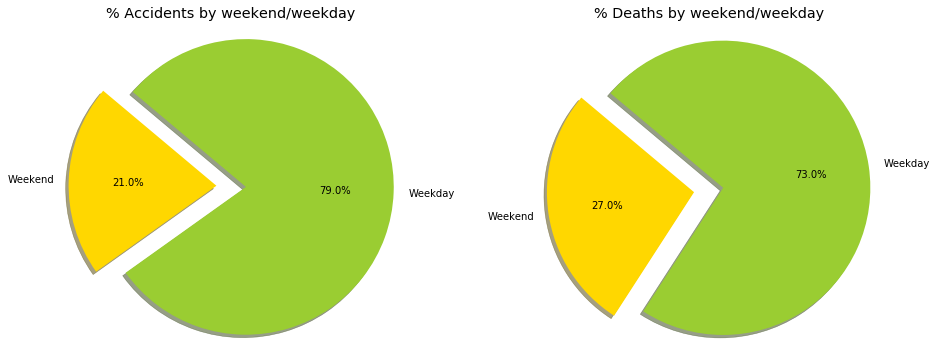

In [18]:
week_hour = accidents.groupby(['weekday_name', 'hour_day']).agg({'incident_#':'count', '#_deaths': 'sum'})
week_hour.columns = ['number_of_accidents', 'number_of_deaths']
week_hour = week_hour.reindex_axis(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],level=0)
# week_hour= week_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
#accidents.loc[accidents['']]
cap_de_setmana = accidents[((accidents['shift'] == 'night') & (accidents['weekday_name'] == 'Friday')) | (accidents['weekday_name'] == 'Saturday') |\
             (accidents['weekday_name'] == 'Sunday')]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['Weekend', 'Weekday']
weekend_acc = cap_de_setmana['incident_#'].count()
weekday_acc = number_total_accidents- weekend_acc

sizes_acc = [weekend_acc, weekday_acc]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by weekend/weekday")

weekend_dea = cap_de_setmana['#_deaths'].sum()
weekday_dea = number_total_deaths- weekend_dea

sizes = [weekend_dea, weekday_dea,]
explode = (0.1, 0.1,)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths by weekend/weekday")
plt.savefig('./charts/accidents_deaths_by_weekend_weekday_2018.png')
plt.show()



/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


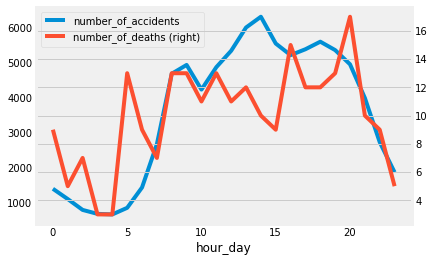

In [19]:
hourly_analysis = accidents.groupby('hour_day').agg({'incident_#': 'count', '#_deaths': 'sum'})
hourly_analysis.columns = ['number_of_accidents', 'number_of_deaths']
hourly_analysis['average_accidents'] = (hourly_analysis['number_of_accidents']/hourly_analysis['number_of_accidents'].sum())*100
hourly_analysis['average_deaths'] = (hourly_analysis['number_of_deaths']/hourly_analysis['number_of_deaths'].sum())*100
hourly_analysis.plot(y=['number_of_accidents', 'number_of_deaths'],secondary_y ='number_of_deaths');

## 6. Deaths/Accidents per shift

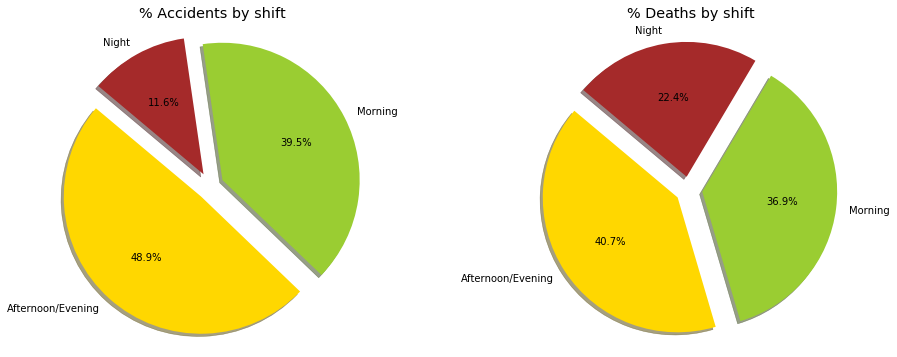

In [20]:
shift = accidents.groupby('shift').agg({'incident_#': 'count', '#_deaths': 'sum'})

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['Afternoon/Evening', 'Morning', 'Night']
aft_acc = shift.at['afternoon/evening','incident_#']
mor_acc = shift.at['morning','incident_#']
nig_acc = shift.at['night','incident_#']
sizes_acc = [aft_acc, mor_acc, nig_acc]
colors = ['gold', 'yellowgreen', 'brown']
explode = (0.1, 0.1,0.1)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by shift")

aft_dea = shift.at['afternoon/evening','#_deaths']
mor_dea = shift.at['morning','#_deaths']
nig_dea = shift.at['night','#_deaths']
sizes = [aft_dea, mor_dea, nig_dea]
explode = (0.1, 0.1,0.1)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths by shift")
plt.savefig('./charts/accidents_deaths_by_shift_2018.png')
plt.show()

# Plotting---SPACIAL BASED FEATURES


1. Deaths/Accidents by DISTRICT.
2. Deaths/Accidents by NEIGHBORHOOD.
3. Deaths/Accidents per STREET/AVENUE.
4. Street and neighborhoods.

## 1. Deaths/Accidents by DISTRICT. 

In [21]:
district = accidents.groupby('district').agg({'incident_#': 'count', '#_deaths': 'sum'})
district.columns =['number_of_accidents', 'number_of_deaths']
district.index = [remove_accents(x) for x in district.index]
district.index = ['Sarria' if x.startswith('Sarr') else x for x in district.index]
district.drop('Desconegut', inplace=True)
district['deaths_per_accident'] = (district['number_of_deaths']/district['number_of_accidents']) * 100

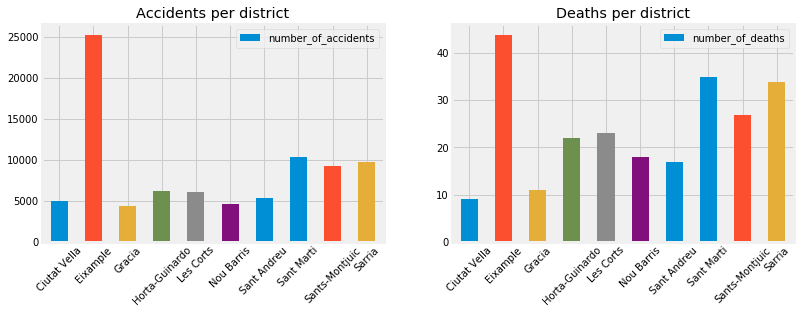

In [22]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
district.plot(kind='bar', ax=axes[0], y ='number_of_accidents', title='Accidents per district',rot=45);
district.plot(kind='bar', ax=axes[1], y= 'number_of_deaths' , title='Deaths per district', rot=45);
plt.savefig('./charts/deaths_accidents_per_district_2018.png')

In [23]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    #name = df[df['cartodb_id'] == id]['n_distri'].values[0]
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            #name = df[df['cartodb_id'] == id+1]['n_distri'].values[0]
            #name = df.at[id,'n_distri']
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = [list(x) for x in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plot_map_fill_multiples_ids(title, city, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
  
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


def plot_cities_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    df['n_distri'] = [posant_accents(x) for x in df['n_distri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_distri == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (7,7));
def plot_map_fill_multiples_ids_tone(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (7,7)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            name = df.at[id,'n_distri']
            plt.text(x0, y0, name, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
        
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
#             for i in range(6):
#                 print ("\n"+str(i+1)+': '+str(int(bins[i]))+
#                        " => "+str(int(bins[i+1])-1))
#             print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
    
def plot_barri_data(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_barri == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone_barri(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (7,7));
    
def plot_map_fill_multiples_ids_tone_barri(sf, title, city,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (9,7)):
   
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            name = df.at[id,'n_barri']
            plt.text(x0, y0,id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

def plot_shape_barri(sf, id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    df = read_shapefile(sf)
    name = df.at[id,'n_barri']
    print(id,name)
    return x0, y0

def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    df = read_shapefile(sf)
    name = df.at[id,'n_barri']
    print(id,name)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
def plot_barri_data_deaths(sf, title, cities, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color_barri(data, color)
    df = read_shapefile(sf)
    df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
    city_id = []
    for i in cities:
        city_id.append(df[df.n_barri == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone_barri(sf, title, city_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
def calc_color_barri(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data.rank(method='first'), 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
#             for i in range(6):
#                 print ("\n"+str(i+1)+': '+str(int(bins[i]))+
#                        " => "+str(int(bins[i+1])-1))
#             print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

def plotting_line(street_name, color=None):    
    street_name = street_name.lower()    
    df = accidents[['street', 'longitude', 'latitude']]
    longitude =[]
    latitude =[]
    for row in df.itertuples():
        if row[1] in street_name:
            longitude.append(row[2])
            latitude.append(row[3])
    long = np.array(longitude).reshape(-1,1)
    lat = np.array(latitude)
    lr = LinearRegression()
    lr.fit(long,lat)
    
    y_1 = lr.intercept_+lr.coef_* min(long)
    y_2 = lr.intercept_ + lr.coef_ * max(long)
    plt.plot([min(long), max(long)],[y_1, y_2], color=color,linewidth=5.0,label = street_name)
    plt.legend()

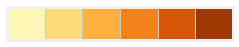

<Figure size 504x504 with 0 Axes>

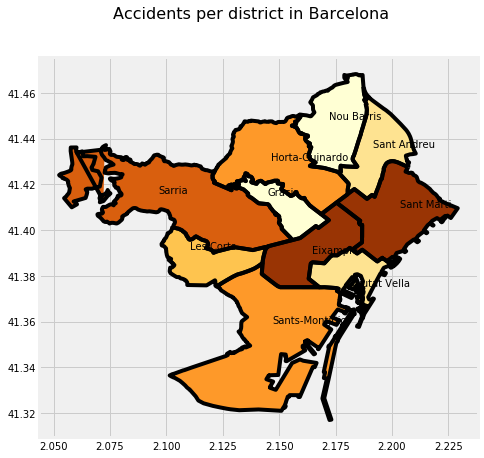

In [24]:
import shapefile as shp
shp_path = "./shapefiles_barcelona_distrito/shapefiles_barcelona_distrito.shp"
sf = shp.Reader(shp_path)
df = read_shapefile(sf)
df['n_distri'] = [posant_accents(x) for x in df['n_distri']]

title = 'Accidents per district in Barcelona'
data = district.number_of_accidents
names = district.index
plot_cities_data(sf, title, names, data, 5, True)
plt.savefig('./charts/shapefile_district_acc.png')

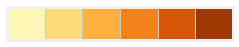

<Figure size 504x504 with 0 Axes>

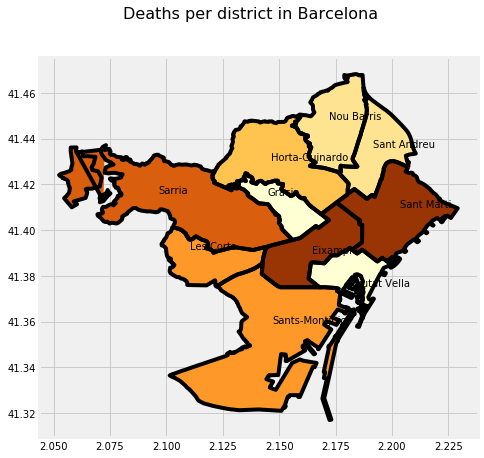

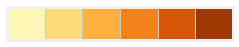

<Figure size 504x504 with 0 Axes>

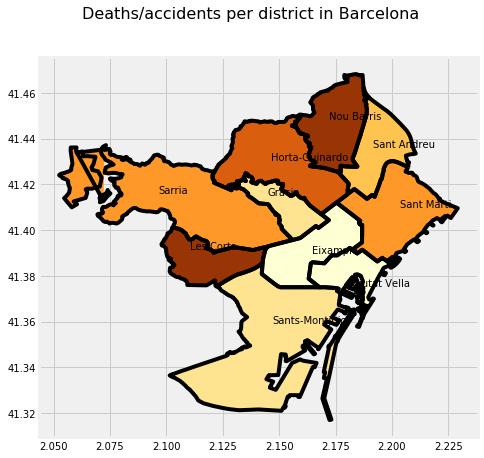

In [25]:
title = 'Deaths per district in Barcelona'
data = district.number_of_deaths
names = district.index
title_1 = 'Deaths/accidents per district in Barcelona'
data_1 = district.deaths_per_accident
plot_cities_data(sf, title, names, data, 6, True)
plt.savefig('./charts/shapefile_district_dea.png')
plot_cities_data(sf, title_1, names, data_1, 6, True)
plt.savefig('./charts/shapefile_district_ratio.png')

## 2. Deaths/Accidents by NEIGHBORHOOD. 


In [26]:
neighborhood = accidents.groupby('neighborhood').agg({'incident_#': 'count', '#_deaths': 'sum'})
neighborhood.columns = ['accidents', 'deaths']
neighborhood['deaths_per_accident'] = (neighborhood['deaths']/neighborhood['accidents']) * 100
neighborhood.drop('Desconegut', inplace=True)
neighborhood.index = [remove_accents(posant_accents(x)) for x in neighborhood.index]
neighborhood['ratio'] = neighborhood['deaths']/neighborhood['accidents']
neighborhood.to_csv('barri.csv')

la Dreta de l'Eixample             9836
l'Antiga Esquerra de l'Eixample    4749
Sant Gervasi - Galvany             3696
la Nova Esquerra de l'Eixample     3342
la Sagrada Familia                 2925
les Corts                          2637
el Fort Pienc                      2418
el Poble Sec                       2138
Sant Antoni                        2085
Sant Gervasi - la Bonanova         2017
la Maternitat i Sant Ramon         1989
la Marina del Prat Vermell         1975
Sant Andreu                        1637
Name: accidents, dtype: int64


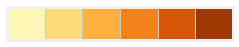

<Figure size 504x504 with 0 Axes>

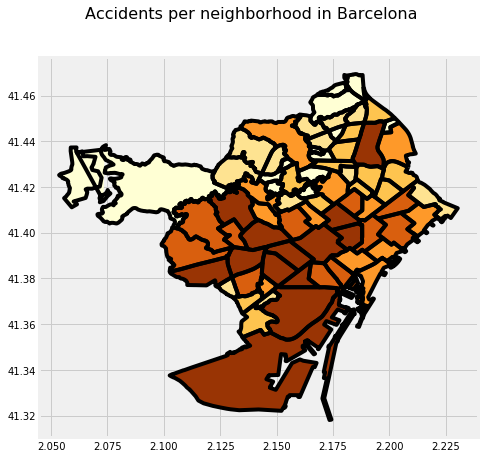

In [27]:
shp_path = "./shapefiles_barrio_barcelona/shapefiles_barrio_barcelona.shp"
sf = shp.Reader(shp_path)
df = read_shapefile(sf)
df['n_distri'] = [posant_accents(x) for x in df['n_distri']]
df['n_barri'] = [posant_accents(x) for x in df['n_barri']]
df
title = 'Accidents per neighborhood in Barcelona'
data = neighborhood.accidents
names = neighborhood.index
plot_barri_data(sf, title, names, data, 6, False);
print(neighborhood.sort_values('accidents', ascending=False).head(13)['accidents'])
plt.savefig('./charts/shapefile_neighborhood_acc.png');

In [28]:
accidents['street'] = [remove_accents(posant_accents(x.strip().lower())) for x in accidents['street']]
accidents['street'] = accidents['street'].str.replace('av ', '')
accidents['street'] = accidents['street'].str.replace('gv corts catalanes', 'corts catalanes')
accidents['street'] = accidents['street'].str.replace('rda litoral', 'litoral').replace('litoral(llobre', 'litoral (llobregat)').\
replace('litoral(besos)', 'litoral (besos)')
accidents['street'] = accidents['street'].str.replace('rda dalt', 'dalt').replace('dalt(llobregat', 'dalt (llobregat)').\
replace("ca l'alegre dalt", "ca l'alegre de dalt").replace('trav dalt', 'dalt')
accidents['street'] = accidents['street'].str.replace('passeig de gracia', 'pg gracia')
accidents['street'] = accidents['street'].str.replace('ctra c-31', 'c-31')
accidents['street'] = accidents['street'].str.replace('rda general mitre', 'general mitre').replace('ronda general mitre', 'general mitre')

accidents['street'] = accidents['street'].str.replace('rbla guipuscoa', 'guipuscoa')
accidents['street'] = accidents['street'].str.replace('via ', '')
accidents['street'] = accidents['street'].str.replace('avrepub argentina', 'republica argentina')
accidents['street'] = accidents['street'].str.replace('pg ', '')
street = accidents.groupby('street').agg({'incident_#': 'count', '#_deaths': 'sum'}).sort_values('incident_#', ascending=False)
street.columns = ['number_of_accidents', 'number_of_deaths']
street['deaths_per_accident'] = (street['number_of_deaths']/street['number_of_accidents'])*100
#[x for x in street.index if x.startswith('Corts')]
street['number_of_accidents'].sum(), street['number_of_accidents'][0:100].sum()


(86686, 46921)

24 la Dreta de l'Eixample


<Figure size 792x648 with 0 Axes>

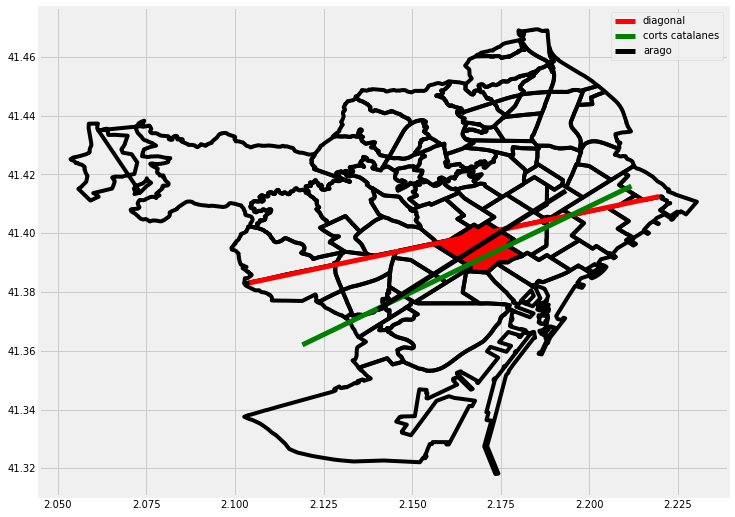

In [29]:
plot_map_fill(24,sf, x_lim=None,y_lim=None)
plotting_line('diagonal', 'red')
plotting_line('Corts Catalanes', 'green')
plotting_line('Arago', 'black')

plt.savefig('/Users/fcbnyc/mystuff/AChicote.github.io/images/dreta_eixample_2018.png');

70 Sant Andreu


<Figure size 792x648 with 0 Axes>

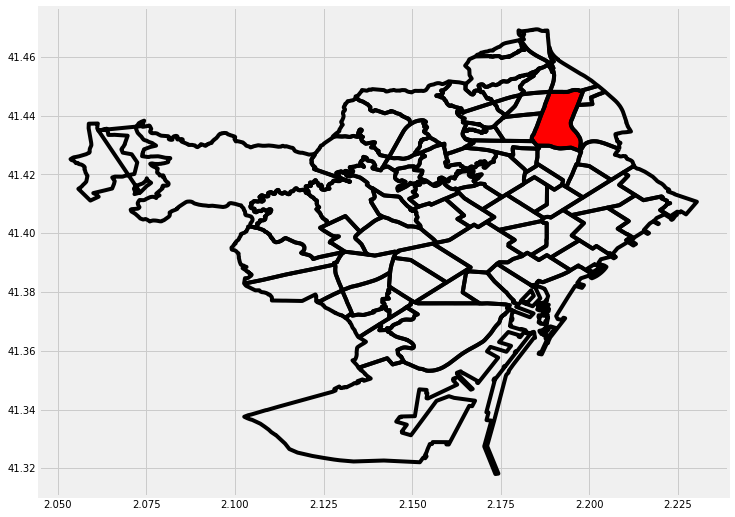

In [30]:
plot_map_fill(70,sf, x_lim=None,y_lim=None)
plt.savefig('./charts/shapefile_neighborhood_sant_andreu.png');

la Dreta de l'Eixample             17.0
Sant Gervasi - Galvany             11.0
l'Antiga Esquerra de l'Eixample    10.0
la Maternitat i Sant Ramon          9.0
les Corts                           8.0
Sant Antoni                         8.0
Sant Gervasi - la Bonanova          8.0
el Guinardo                         7.0
Sarria                              7.0
el Putxet i el Farro                6.0
Sants                               6.0
Pedralbes                           6.0
Provençals del Poblenou             6.0
Name: deaths, dtype: float64


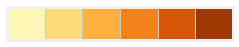

<Figure size 792x648 with 0 Axes>

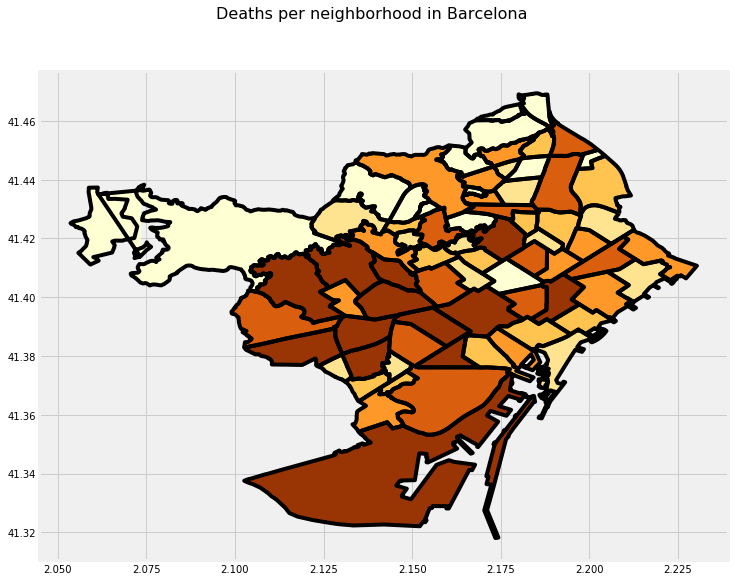

In [31]:
title = 'Deaths per neighborhood in Barcelona'
data = neighborhood.deaths
names = neighborhood.index
plot_barri_data_deaths(sf, title, names, data, 6, False);
print(neighborhood.sort_values('deaths', ascending=False).head(13)['deaths'])
plt.savefig('./charts/shapefile_neighborhood_deaths.png')

el Turo de la Peira              0.013575
Can Baro                         0.011050
la Teixonera                     0.007752
la Guineueta                     0.007481
Vilapicina i la Torre Llobeta    0.006849
el Guinardo                      0.006796
el Coll                          0.006579
el Carmel                        0.006353
el Putxet i el Farro             0.005687
el Besos i el Maresme            0.005474
la Trinitat Vella                0.005464
les Roquetes                     0.005195
el Congres i els Indians         0.004751
Name: ratio, dtype: float64


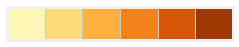

<Figure size 504x504 with 0 Axes>

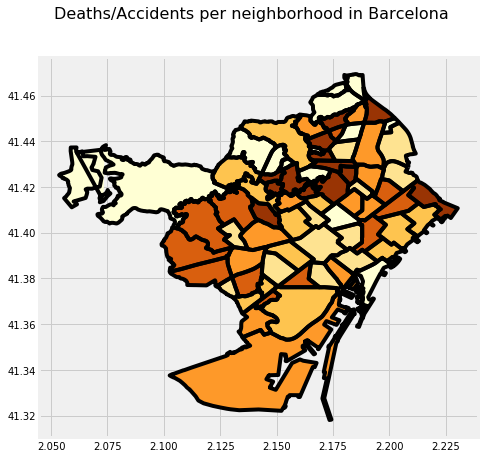

In [32]:
title = 'Deaths/Accidents per neighborhood in Barcelona'
data = neighborhood.ratio
names = neighborhood.index
plot_barri_data(sf, title, names, data, 6, False);
print(neighborhood.sort_values('ratio', ascending=False).head(13)['ratio'])
plt.savefig('./charts/shapefile_neighborhood_ratio.png')

57 el TurÃ³ de la Peira


<Figure size 792x648 with 0 Axes>

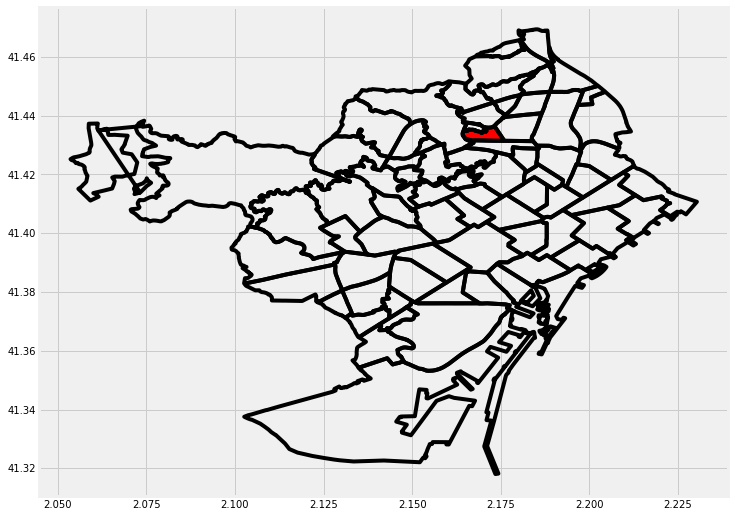

In [33]:
plot_map_fill(57,sf, x_lim=None,y_lim=None)

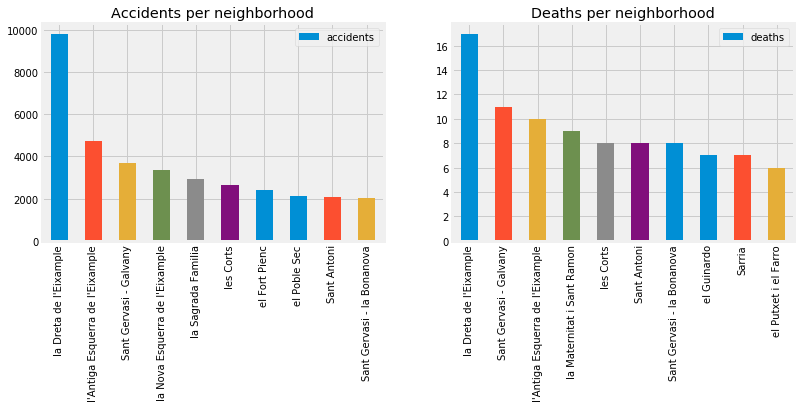

In [34]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
neighborhood.sort_values('accidents', ascending=False).head(10).plot(kind='bar', ax=axes[0], y ='accidents', title='Accidents per neighborhood');
neighborhood.sort_values('deaths', ascending=False).head(10).plot(kind='bar', ax=axes[1], y= 'deaths' , title='Deaths per neighborhood');
plt.savefig('./charts/deaths_accidents_per_neighborhood_2018.png', bbox_inches = 'tight')



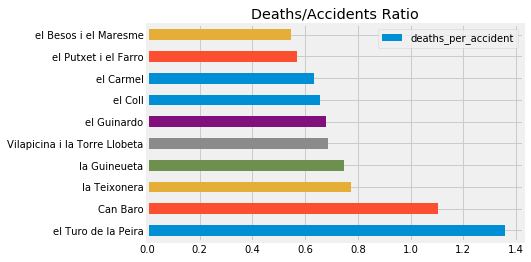

In [35]:
neighborhood[neighborhood['accidents'] > 100].sort_values('ratio', ascending=False).head(10)\
.plot(kind='barh', y= 'deaths_per_accident',title='Deaths/Accidents Ratio');                          
plt.savefig('./charts/ratio_per_neighborhood_2018.png')                                               
plt.savefig('/Users/fcbnyc/mystuff/AChicote.github.io/images/ratio_per_neighborhood_2018.png', bbox_inches = 'tight')


In [36]:
#How many of ghe neighborhoods with more accidents have also a high rate death/accidents?
most_accidents = set(neighborhood.sort_values('accidents', ascending=False).head(10).index)
most_ratio = set(neighborhood[neighborhood['accidents'] > 100].sort_values('deaths_per_accident', ascending=False).head(10).index)
most_deaths = set(neighborhood.sort_values('deaths', ascending=False).head(10).index)

common_member(most_accidents, most_ratio)
common_member(most_deaths,most_ratio)

No common elements
{'el Guinardo', 'el Putxet i el Farro'}


In [37]:
##Very interesting: None of the neighborhoods with more accidents are the ones with highest ratio.
##Only 2 of the neighborhoods with high number of deaths (the 8th and the 10th)

In [38]:
data_neighborhood = pd.DataFrame()
data_neighborhood['Ten neighborhoods with more accidents:'] = neighborhood.sort_values('accidents',ascending=False).index[0:10]
data_neighborhood['accidents:'] = neighborhood.sort_values('accidents', ascending=False)['accidents'][0:10].values
data_neighborhood['Ten neighborhoods with more deaths:'] = neighborhood.sort_values('deaths',ascending=False).index[0:10]
data_neighborhood['deaths:'] = neighborhood.sort_values('deaths',ascending=False)['deaths'][0:10].values
data_neighborhood['Ten streets with highest average:'] = neighborhood[neighborhood['accidents'] > 50].sort_values('deaths_per_accident',ascending=False).index[0:10]
data_neighborhood['Average:'] = neighborhood[neighborhood['accidents'] > 50].sort_values('deaths_per_accident',ascending=False)['deaths_per_accident'][0:10].values
data_neighborhood




,Ten neighborhoods with more accidents:,accidents:,Ten neighborhoods with more deaths:,deaths:,Ten streets with highest average:,Average:
0,la Dreta de l'Eixample,9836,la Dreta de l'Eixample,17.0,el Turo de la Peira,1.357466
1,l'Antiga Esquerra de l'Eixample,4749,Sant Gervasi - Galvany,11.0,Can Baro,1.104972
2,Sant Gervasi - Galvany,3696,l'Antiga Esquerra de l'Eixample,10.0,la Teixonera,0.775194
3,la Nova Esquerra de l'Eixample,3342,la Maternitat i Sant Ramon,9.0,la Guineueta,0.748130
4,la Sagrada Familia,2925,les Corts,8.0,Vilapicina i la Torre Llobeta,0.684932
5,les Corts,2637,Sant Antoni,8.0,el Guinardo,0.679612
6,el Fort Pienc,2418,Sant Gervasi - la Bonanova,8.0,el Coll,0.657895
7,el Poble Sec,2138,el Guinardo,7.0,el Carmel,0.635324
8,Sant Antoni,2085,Sarria,7.0,el Putxet i el Farro,0.568720
9,Sant Gervasi - la Bonanova,2017,el Putxet i el Farro,6.0,el Besos i el Maresme,0.547445


## 3. Deaths/Accidents by STREET. 

In [39]:
def checking_street(street_name):
    street_name = street_name.lower()
    carrers = []
    for a, b in zip(df_carrers['street_1'], df_carrers['street_2']):
        if street_name in a:
            carrers.append(a)

        if street_name in b:
            carrers.append(b)
    return carrers, set(carrers)
# a, b = checking_street("madrid")
# b
# for i in b:
#     print(i, a.count(i))

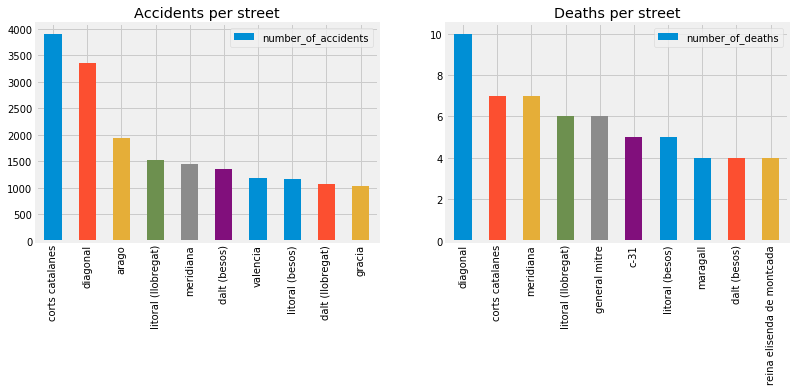

In [40]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot = street.head(10).plot(kind='bar', ax=axes[0], y ='number_of_accidents', title='Accidents per street');

plotty = street.sort_values('number_of_deaths', ascending=False).head(10).plot(kind='bar', ax=axes[1], y= 'number_of_deaths' , title='Deaths per street');
plot.set_xlabel("")
plotty.set_xlabel('')
plt.savefig('./charts/deaths_accidents_per_street_2018.png', bbox_inches = 'tight')
plt.savefig('/Users/fcbnyc/mystuff/AChicote.github.io/images/deaths_accidents_per_street_2018.png', bbox_inches = 'tight')


#street.head(15).plot(kind='bar', y='number_of_accidents')

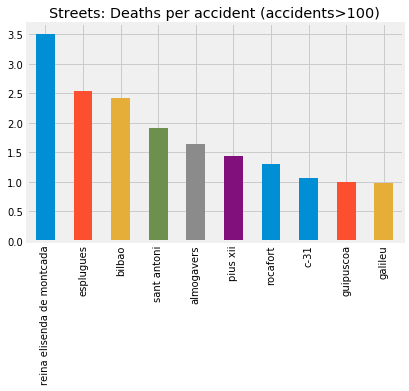

In [41]:
plot = street[street['number_of_accidents'] >100].sort_values('deaths_per_accident',ascending=False).head(10).\
plot(kind='bar', y='deaths_per_accident',legend=False, title='Streets: Deaths per accident (accidents>100)')
plot.set_xlabel("")
plt.savefig('/Users/fcbnyc/mystuff/AChicote.github.io/images/deaths_accidents_per_street_2018.png', bbox_inches = 'tight')


#street.head(15).plot(kind='b

In [42]:
#How many of ghe streets with more accidents have also a high rate death/accidents?
most_accidents = set(street.sort_values('number_of_accidents', ascending=False).head(10).index)
most_ratio = set(street[street['number_of_accidents'] >100].sort_values('deaths_per_accident', ascending=False).head(10).index)
most_deaths = set(street.sort_values('number_of_deaths', ascending=False).head(10).index)
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        print(a_set & b_set) 
    else: 
        print("No common elements")
common_member(most_accidents, most_ratio)
common_member(most_deaths,most_ratio)

No common elements
{'c-31', 'reina elisenda de montcada'}


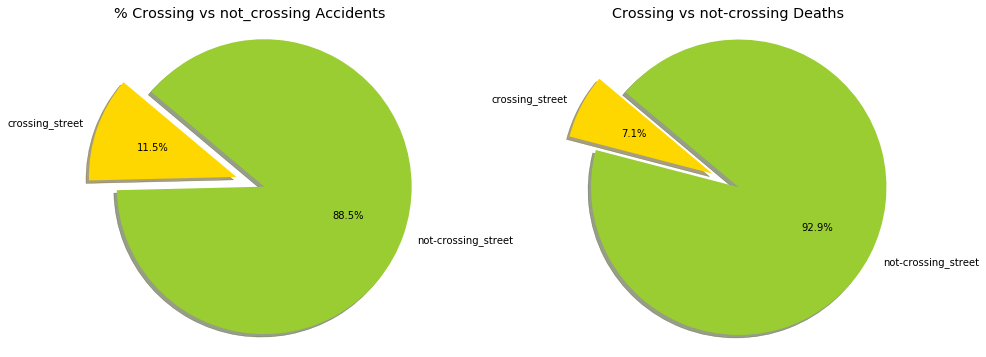

In [43]:
##Are the cross orads riskier than the roads?
accidents['street_crossing'] = [1 if '/' in x else 0 for x in accidents['street']]
street_crossing = accidents[accidents['street_crossing'] == 1]
no_street_crossing = accidents[accidents['street_crossing'] == 0]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['crossing_street', 'not-crossing_street']

sizes_acc = [len(street_crossing), len(no_street_crossing)]
colors = ['gold', 'yellowgreen',]
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Crossing vs not_crossing Accidents")

sizes = [street_crossing['#_deaths'].sum(), no_street_crossing['#_deaths'].sum()]
explode = (0.1, 0.1,)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("Crossing vs not-crossing Deaths")
plt.savefig('./charts/accidents_deaths_by_crossing_2018.png')
plt.show()

In [44]:
##let's include cross roadas to ghe analysis

size = max([len(x.split('/')) for x in accidents['street']])
columnes = ['incident_#', '#_deaths','longitude', 'latitude']
columnes.extend(['street_{}'.format(x) for x in range(1, size+1)])
df = accidents[['incident_#', 'street', '#_deaths', 'longitude', 'latitude']].copy()
my_dict = {}
for colum in columnes:
    my_dict[colum] = []
my_dict
for row in df.itertuples():
    #print(row)
    my_dict['incident_#'].append(row[1])
    my_dict['#_deaths'].append(row[3])
    my_dict['longitude'].append(row[4])
    my_dict['latitude'].append(row[5])
    #print(row)
    if '/' not in str(row[2]):
        my_dict['street_1'].append(row[2])
        my_dict['street_2'].append('')
    else:
        split = row[2].split('/')
        
        my_dict['street_1'].append(split[0].strip())
        my_dict['street_2'].append(split[1].strip())

df_carrers = pd.DataFrame()
for key in my_dict.keys():
    df_carrers[key] = my_dict[key]
dataframe = pd.DataFrame()
total_street = my_dict['street_1']+my_dict['street_2']
total_street = [x for x in total_street if x != '']

for element in set(total_street):
    dataframe.at[element, 'accidents'] = total_street.count(element)
    dataframe.at[element, 'deaths'] = df_carrers[(df_carrers['street_1'] == element)|(df_carrers['street_2'] == element)]['#_deaths'].sum()
dataframe.head()

,accidents,deaths
cadi,12.0,0.0
abadessa olzet,18.0,0.0
beatriu,7.0,0.0
joaquin costa,13.0,0.0
pl sanllehy,2.0,0.0


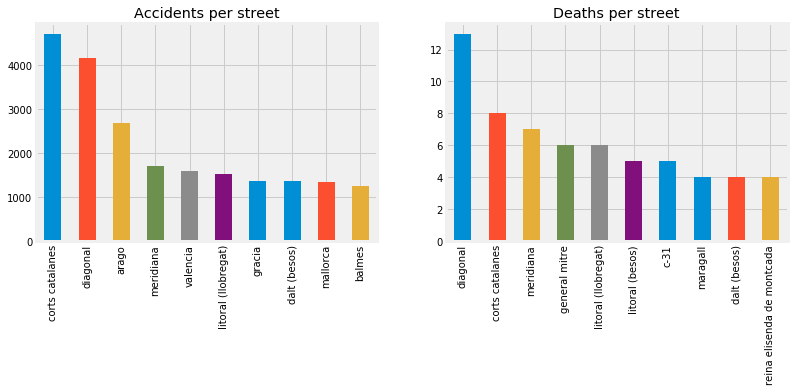

In [45]:
dataframe['ratio'] = dataframe['deaths']/dataframe['accidents']
fig, axes = plt.subplots(1,2, figsize=(12,4))
dataframe.sort_values('accidents', ascending=False,).head(10).\
plot(kind='bar', ax=axes[0], y='accidents', title='Accidents per street', legend=False);
dataframe.sort_values('deaths', ascending=False,).head(10).\
plot(kind='bar', ax=axes[1], y='deaths', title='Deaths per street', legend=False);
plt.savefig('/Users/fcbnyc/mystuff/AChicote.github.io/images/deaths_accidents_per_street_2018_w_crossing.png', bbox_inches = 'tight')

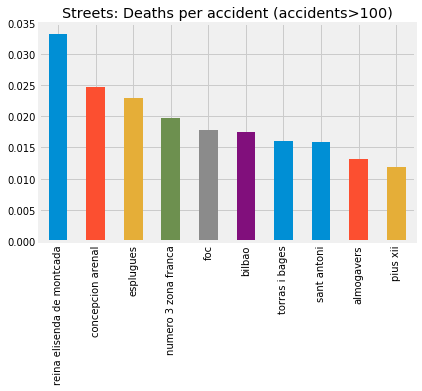

In [46]:
dataframe[dataframe['accidents'] > 100].sort_values('ratio',ascending=False).head(10).\
plot(kind='bar', y='ratio',legend=False, title='Streets: Deaths per accident (accidents>100)');
plt.savefig('/Users/fcbnyc/mystuff/AChicote.github.io/images/ratio_per_street_2018_w_crossing.png', bbox_inches = 'tight')

In [47]:
#How many of the streets with more accidents have also a high rate death/accidents?
most_accidents = set(dataframe.sort_values('accidents', ascending=False).head(10).index)
most_ratio = set(dataframe[dataframe['accidents'] > 100].sort_values('ratio', ascending=False).head(10).index)
most_deaths = set(dataframe.sort_values('deaths', ascending=False).head(10).index)
common_member(most_accidents, most_ratio)
common_member(most_deaths,most_ratio)

No common elements
{'reina elisenda de montcada'}


In [48]:
data_streets = pd.DataFrame()
data_streets['Ten streets with more accidents:'] = dataframe.sort_values('accidents',ascending=False).index[0:10]
data_streets['accidents:'] = dataframe.sort_values('accidents', ascending=False)['accidents'][0:10].values
data_streets['Ten streets with more deaths:'] = dataframe.sort_values('deaths',ascending=False).index[0:10]
data_streets['deaths:'] = dataframe.sort_values('deaths',ascending=False)['deaths'][0:10].values
data_streets['Ten streets with highest average:'] = dataframe[dataframe['accidents'] > 100].sort_values('ratio',ascending=False).index[0:10]
data_streets['Average:'] = dataframe[dataframe['accidents'] > 100].sort_values('ratio',ascending=False)['ratio'][0:10].values
data_streets

,Ten streets with more accidents:,accidents:,Ten streets with more deaths:,deaths:,Ten streets with highest average:,Average:
0,corts catalanes,4709.0,diagonal,13.0,reina elisenda de montcada,0.033333
1,diagonal,4150.0,corts catalanes,8.0,concepcion arenal,0.024793
2,arago,2675.0,meridiana,7.0,esplugues,0.022901
3,meridiana,1699.0,general mitre,6.0,numero 3 zona franca,0.019802
4,valencia,1595.0,litoral (llobregat),6.0,foc,0.017857
5,litoral (llobregat),1522.0,litoral (besos),5.0,bilbao,0.017442
6,gracia,1350.0,c-31,5.0,torras i bages,0.016000
7,dalt (besos),1348.0,maragall,4.0,sant antoni,0.015873
8,mallorca,1339.0,dalt (besos),4.0,almogavers,0.013158
9,balmes,1245.0,reina elisenda de montcada,4.0,pius xii,0.011905


## 4. STREET & neighborhood. 
# drawing streets on the map

In [49]:
### What are the most dangerous streets in the most dangerous neighborhoods?
most_ratio = set(neighborhood.sort_values('deaths_per_accident', ascending=False).head(10).index)
#most_ratio
neighborhood_street = accidents[accidents['neighborhood'].isin(most_ratio)].\
groupby('street').agg({'incident_#': 'count', '#_deaths':'sum'})
neighborhood_street.columns =['accidents', 'deaths']
neighborhood_street['average'] = neighborhood_street['deaths']/neighborhood_street['accidents']
neighborhood_street.sort_values('accidents',inplace=True, ascending=False)
dd = pd.DataFrame()
dd['Ten streets with more accidents:'] = neighborhood_street.index[0:10]
dd['accidents:'] = neighborhood_street['accidents'][0:10].values
dd['Ten streets with more deaths:'] = neighborhood_street.sort_values('deaths',ascending=False).index[0:10]
dd['deaths:'] = neighborhood_street.sort_values('deaths',ascending=False)['deaths'][0:10].values
dd['Ten streets with highest average:'] = neighborhood_street[neighborhood_street['accidents'] > 50].sort_values('average',ascending=False).index[0:10]
dd['Average:'] = neighborhood_street[neighborhood_street['accidents'] > 50].sort_values('average',ascending=False)['average'][0:10].values
dd


,Ten streets with more accidents:,accidents:,Ten streets with more deaths:,deaths:,Ten streets with highest average:,Average:
0,general mitre,234,general mitre,3.0,escocia,0.031250
1,maragall,215,maragall,2.0,c-31,0.018519
2,fabra i puig,193,mare de deu de montserrat,2.0,valldaura,0.017241
3,mare de deu de montserrat,184,conca de tremp,2.0,mare de deu del coll,0.012987
4,balmes,145,valldaura,2.0,general mitre,0.012821
5,republica argentina,133,escocia,2.0,mare de deu de montserrat,0.010870
6,carmel,119,escocia / antoni costa,1.0,maragall,0.009302
7,valldaura,116,volart,1.0,carmel,0.008403
8,llobregos,95,llull,1.0,republica argentina,0.007519
9,guinardo,93,verdum,1.0,fabra i puig,0.005181


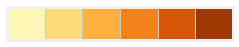

<Figure size 792x648 with 0 Axes>

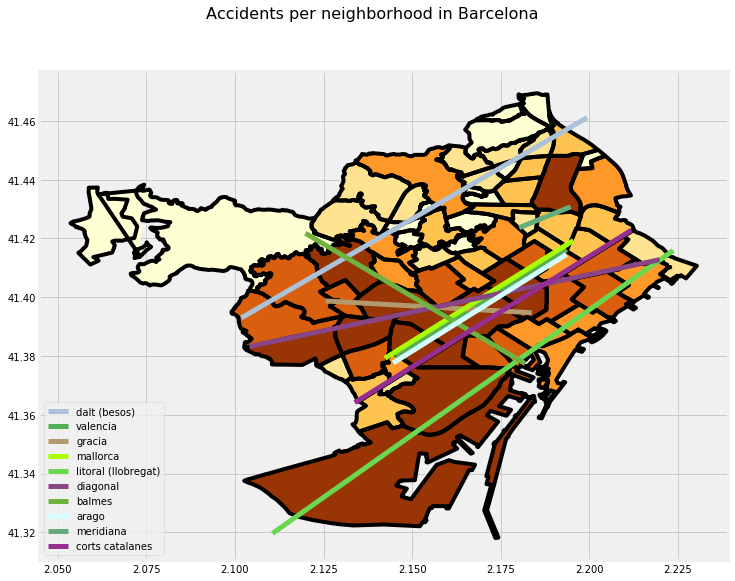

In [50]:
# Do it for top 10 streets
#street_name = 'meridiana'
def plotting_scatter(street_name, color=None):    
    street_name = street_name.lower()    
    df = accidents[['street', 'longitude', 'latitude']]
    longitude =[]
    latitude =[]
    for row in df_carrers.itertuples():
        if (row[5] == street_name) or (row[6] == street_name):
            longitude.append(row[3])
            latitude.append(row[4])
    
    plt.scatter(longitude,latitude, color=color,linewidth=5.0,label = street_name)
    plt.legend()    

def plotting_line(street_name, color=None):    
    street_name = street_name.lower()    
    df = accidents[['street', 'longitude', 'latitude']]
    longitude =[]
    latitude =[]
    for row in df_carrers.itertuples():
        if (row[5] == street_name) or (row[6] == street_name):
            longitude.append(row[3])
            latitude.append(row[4])
    long = np.array(longitude).reshape(-1,1)
    lat = np.array(latitude)
    lr = LinearRegression()
    lr.fit(long,lat)
    
    y_1 = lr.intercept_+lr.coef_* min(long)
    y_2 = lr.intercept_ + lr.coef_ * max(long)
    plt.plot([min(long), max(long)],[y_1, y_2], color=color,linewidth=5.0,label = street_name)
    plt.legend()
title = 'Accidents per neighborhood in Barcelona'
data = neighborhood.accidents
names = neighborhood.index
plot_barri_data_deaths(sf, title, names, data, 6);
colors_list = list(colors_pyplot._colors_full_map.values())
colors = [colors_list[x] for x in range(0,len(colors_list)) if (x%20) == 0]
for carrer,color in zip(most_accidents, colors_list):
    plotting_line(carrer, color)

plt.savefig('./charts/accidents_neigh_carrers_2018.png')

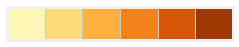

<Figure size 792x648 with 0 Axes>

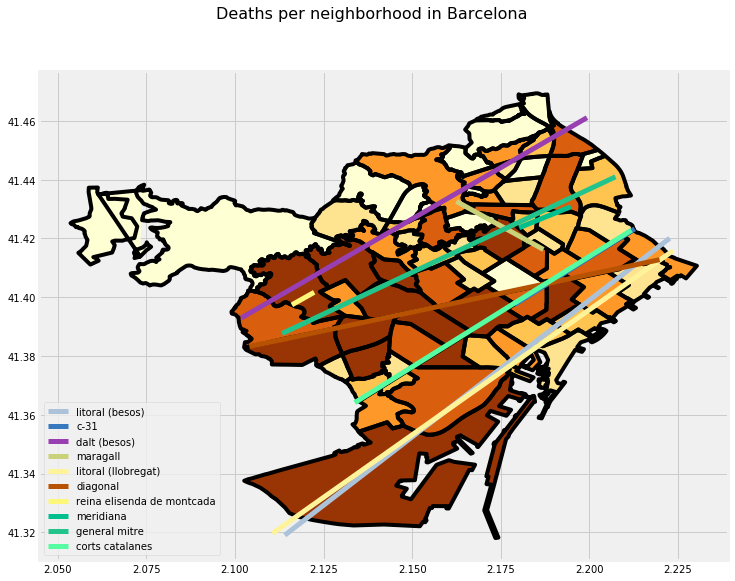

In [51]:
title = 'Deaths per neighborhood in Barcelona'
data = neighborhood.deaths
names = neighborhood.index
plot_barri_data_deaths(sf, title, names, data, 6);
for carrer,color in zip(most_deaths, colors):
    plotting_line(carrer, color)
plt.savefig('./charts/deaths_neigh_carrers_2018.png')

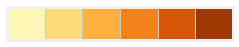

<Figure size 792x648 with 0 Axes>

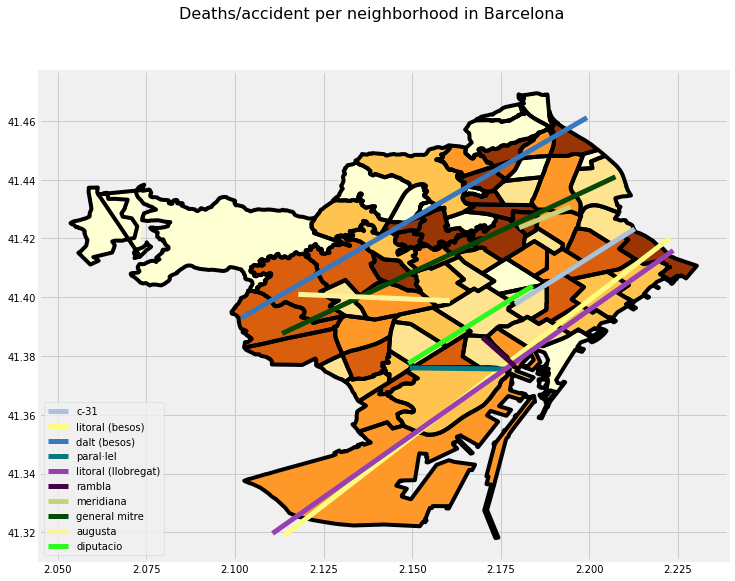

In [104]:
title = 'Deaths/accident per neighborhood in Barcelona'
data = neighborhood.ratio
names = neighborhood.index
plot_barri_data_deaths(sf, title, names, data, 6);
colors = [colors_list[x] for x in range(0,len(colors_list)) if (x%10) == 0]
for carrer,color in zip(most_ratio, colors):
    plotting_line(carrer, color)
plt.savefig('./charts/ratio_neighs_carrers_2018.png')

## Street, neighborhood and shift-----QLIK

In [53]:
neighborhood_night = accidents[accidents['shift'] == 'night'].groupby('neighborhood').agg({'incident_#': 'count', '#_deaths': 'sum'})
neighborhood_night.columns = ['accidents', 'deaths']
neighborhood_night.drop('Desconegut',inplace=True)
neighborhood_night['ratio'] = neighborhood_night['deaths']/neighborhood_night['accidents']
most_accidents = set(neighborhood_night.sort_values('accidents', ascending=False).head(10).index)
most_ratio = set(neighborhood_night[neighborhood_night['accidents'] > 50].sort_values('ratio', ascending=False).head(10).index)
most_deaths = set(neighborhood_night.sort_values('deaths', ascending=False).head(10).index)

print('Neighborhoods in top ten for accidents and ratio during night:')
common_member(most_accidents, most_ratio)
print('Neighborhoods in top ten for deaths and ratio during night:')
common_member(most_deaths,most_ratio)
acc = common_member_and_number(most_accidents, list(data_neighborhood[data_neighborhood.columns[0]]))
print("Neighborhoods in top ten for accidents the whole day and night:", len(acc), acc)
dea = common_member_and_number(most_deaths, list(data_neighborhood[data_neighborhood.columns[2]]))
print("Neighborhoods in top ten for deaths the whole day and night:", len(dea), dea)
rat = common_member_and_number(most_deaths, list(data_neighborhood[data_neighborhood.columns[4]]))
print("Neighborhoods in top ten for ratio the whole day and night:", len(rat), rat)


Neighborhoods in top ten for accidents and ratio during night:
{'el Barri Gotic'}
Neighborhoods in top ten for deaths and ratio during night:
{'el Carmel', 'el Clot', 'la Marina del Prat Vermell', 'Sant Andreu', 'Pedralbes', 'el Barri Gotic', 'Sarria'}
Neighborhoods in top ten for accidents the whole day and night: 9 ["l'Antiga Esquerra de l'Eixample", "la Dreta de l'Eixample", 'la Sagrada Familia', "la Nova Esquerra de l'Eixample", 'Sant Gervasi - Galvany', 'el Poble Sec', 'les Corts', 'Sant Antoni', 'el Fort Pienc']
Neighborhoods in top ten for deaths the whole day and night: 3 ['les Corts', 'Sant Gervasi - Galvany', 'Sarria']
Neighborhoods in top ten for ratio the whole day and night: 1 ['el Carmel']


In [55]:
street_night = accidents[accidents['shift'] == 'night'].groupby('street').agg({'incident_#': 'count', '#_deaths': 'sum'})
street_night.columns = ['accidents', 'deaths']
street_night['ratio'] = street_night['deaths']/street_night['accidents']
most_accidents = set(street_night.sort_values('accidents', ascending=False).head(10).index)
most_ratio = set(street_night[street_night['accidents'] > 50].sort_values('ratio', ascending=False).head(10).index)
most_deaths = set(street_night.sort_values('deaths', ascending=False).head(10).index)
print('Streets in top ten for accidents and ratio during night:')
common_member(most_accidents, most_ratio)
print('Streets in top ten for deaths and ratio during night:')
common_member(most_deaths,most_ratio)
acc = common_member_and_number(most_accidents, list(data_streets[data_streets.columns[0]]))
print("Streets in top ten for accidents the whole day and night:", len(acc), acc)
dea = common_member_and_number(most_deaths, list(data_streets[data_streets.columns[2]]))
print("Streets in top ten for deaths the whole day and night:", len(dea), dea)
rat = common_member_and_number(most_deaths, list(data_streets[data_streets.columns[4]]))
print("Streets in top ten for ratio the whole day and night:", len(rat), rat)


Streets in top ten for accidents and ratio during night:
{'litoral (besos)', 'meridiana', 'paral·lel', 'litoral (llobregat)'}
Streets in top ten for deaths and ratio during night:
{'c-31', 'meridiana', 'litoral (besos)', 'litoral (llobregat)'}
Streets in top ten for accidents the whole day and night: 8 ['valencia', 'gracia', 'litoral (llobregat)', 'diagonal', 'balmes', 'arago', 'meridiana', 'corts catalanes']
Streets in top ten for deaths the whole day and night: 5 ['litoral (besos)', 'c-31', 'litoral (llobregat)', 'reina elisenda de montcada', 'meridiana']
Streets in top ten for ratio the whole day and night: 2 ['reina elisenda de montcada', 'esplugues']


### About the deads, minor injures, severely injured and victims

In [56]:
accidents['#_deaths'] = accidents['#_deaths'].astype(int)
taula = pd.DataFrame(accidents.groupby('#_deaths').count()['incident_#'])
taula  = taula.rename(columns={"incident_#": "amount of accidents"})
taula['Percentage over total'] = (taula['amount of accidents']/len(accidents)) *100
taula['Percentage over total'] = ['{:,.4f}%'.format(x) for x in taula['Percentage over total']]
taula

,amount of accidents,Percentage over total
#_deaths,,
0,86453,99.7312%
1,227,0.2619%
2,4,0.0046%
3,2,0.0023%


In [57]:
### Let's focus only in the number of deads. It is clear to see how the few accidnets
### with a big number of deads can change everything
taula2 = pd.DataFrame((accidents[accidents['#_deaths'] > 0]).groupby(['#_deaths']).count()['incident_#'])
taula2  = taula2.rename(columns={"incident_#": "amount_of_accidents"})
taula2['percentage_over_total'] = (taula2['amount_of_accidents']/taula2['amount_of_accidents'].sum()) *100
taula2['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in taula2['percentage_over_total']]
taula2['total_number_deaths'] = taula2['amount_of_accidents'] * taula2.index
taula2['percentage_over_deaths'] = (taula2['total_number_deaths']/taula2['total_number_deaths'].sum()) *100
taula2['percentage_over_deaths'] = ['{:,.4f}%'.format(x) for x in taula2['percentage_over_deaths']]

taula2

,amount_of_accidents,percentage_over_total,total_number_deaths,percentage_over_deaths
#_deaths,,,,
1,227,97.4249%,227,94.1909%
2,4,1.7167%,8,3.3195%
3,2,0.8584%,6,2.4896%


In [58]:
accidents['minor_injuries'] = accidents['minor_injuries'].astype(int)
minor = pd.DataFrame(accidents.groupby('minor_injuries').count()['incident_#'])
minor = minor.rename(columns={'incident_#': "number_of_accidents"})
minor['percentage_over_total'] = (minor['number_of_accidents']/len(accidents))*100
minor['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in minor['percentage_over_total']]
minor['accumulative'] = (minor['number_of_accidents'].cumsum()/len(accidents))*100
minor['accumulative'] = ['{:,.2f}%'.format(x) for x in minor['accumulative']]
minor[0:10]

,number_of_accidents,percentage_over_total,accumulative
minor_injuries,,,
0,9216,10.6315%,10.63%
1,60440,69.7229%,80.35%
2,13226,15.2574%,95.61%
3,2380,2.7455%,98.36%
4,852,0.9829%,99.34%
5,323,0.3726%,99.71%
6,133,0.1534%,99.87%
7,51,0.0588%,99.93%
8,28,0.0323%,99.96%


In [59]:
accidents['severe_injuries'] = accidents['severe_injuries'].astype(int)
greu = pd.DataFrame(accidents.groupby('severe_injuries').count()['incident_#'])
greu = greu.rename(columns={'incident_#': "number_of_accidents"})
greu['percentage_over_total'] = (greu['number_of_accidents']/len(accidents))*100
greu['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in greu['percentage_over_total']]
greu

,number_of_accidents,percentage_over_total
severe_injuries,,
0,84696,97.7044%
1,1885,2.1745%
2,91,0.1050%
3,12,0.0138%
4,2,0.0023%


In [60]:
accidents['amount_victims'] = accidents['amount_victims'].astype(int)
total_amount = pd.DataFrame(accidents.groupby('amount_victims').count()['incident_#'])
total_amount = total_amount.rename(columns={'incident_#': "number_of_accidents"})
total_amount['percentage_over_total'] = (total_amount['number_of_accidents']/len(accidents))*100
total_amount['percentage_over_total'] = ['{:,.4f}%'.format(x) for x in total_amount['percentage_over_total']]
total_amount['accrued'] = total_amount['number_of_accidents'].cumsum()/len(accidents) * 100
total_amount['accrued'] = ['{:,.4f}%'.format(x) for x in total_amount['accrued']]
total_amount[0:10]

,number_of_accidents,percentage_over_total,accrued
amount_victims,,,
0,7586,8.7511%,8.7511%
1,61557,71.0115%,79.7626%
2,13619,15.7107%,95.4733%
3,2454,2.8309%,98.3042%
4,885,1.0209%,99.3252%
5,323,0.3726%,99.6978%
6,138,0.1592%,99.8570%
7,55,0.0634%,99.9204%
8,31,0.0358%,99.9562%


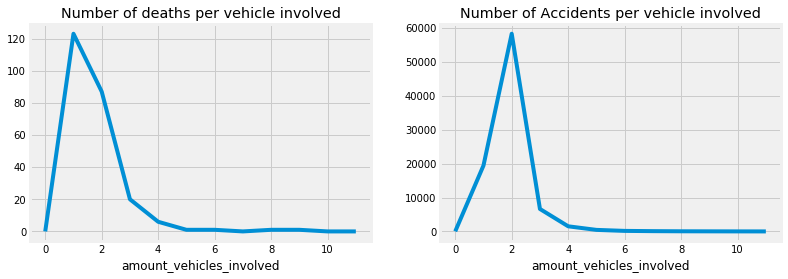

In [61]:
accidents['amount_vehicles_involved'] = accidents['amount_vehicles_involved'].astype(int)
deads_number_vehicles = accidents.groupby('amount_vehicles_involved').sum()['#_deaths']
accidents_number_vehicles = accidents.groupby('amount_vehicles_involved').count()['#_deaths']
fig, axes = plt.subplots(1,2, figsize=(12,4))

deads_number_vehicles[0:12].plot(kind='line', ax=axes[0],\
                                 title="Number of deaths per vehicle involved")
accidents_number_vehicles[0:12].plot(kind='line', ax=axes[1],\
                                 title="Number of Accidents per vehicle involved")

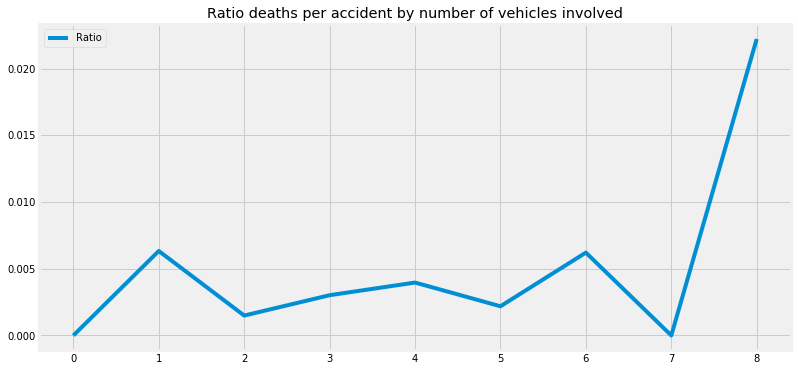

In [62]:
ratio = []
for x, y in zip(deads_number_vehicles, accidents_number_vehicles):
    ratio.append(x/y)
ratio
max_ratio = 0
number_vehicles =  0
for x, y in zip(ratio, deads_number_vehicles.index):
    if x > max_ratio:
        max_ratio = x
        number_vehicles = y
max_ratio, number_vehicles

plt.figure(figsize=(12, 6))
plt.xticks(range(0,17))
plt.title('Ratio deaths per accident by number of vehicles involved')
plt.plot(accidents_number_vehicles.index[0:9], ratio[0:9], label= 'Ratio')
plt.legend()
plt.savefig('./charts/ratio_deaths_accidents_vehicles_2018.png');

In [63]:
vehicles = pd.DataFrame(accidents.groupby('amount_vehicles_involved').count()['incident_#'])
columns = ['number_of_accidents']
vehicles.columns = columns
vehicles['average_accidents'] = vehicles['number_of_accidents']/len(accidents)
vehicles['average_accidents_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['average_accidents']]
vehicles['accrued_accidents'] = vehicles['number_of_accidents'].cumsum()/len(accidents)
vehicles['accrued_accidents_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['accrued_accidents']]
vehicles['number_of_deaths'] = (accidents.groupby('amount_vehicles_involved').sum()['#_deaths']).values
vehicles['average_deaths'] = vehicles['number_of_deaths']/accidents['#_deaths'].sum()
vehicles['average_deaths_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['average_deaths']]
vehicles['accrued_deaths'] = vehicles['number_of_deaths'].cumsum()/accidents['#_deaths'].sum()
vehicles['accrued_deaths_%'] = ['{:,.4f}%'.format(100 * x) for x in vehicles['accrued_deaths']]

In [64]:
vehicles.drop(['average_accidents', 'average_deaths', 'accrued_accidents', 'accrued_deaths'], axis=1)[0:10]

,number_of_accidents,average_accidents_%,accrued_accidents_%,number_of_deaths,average_deaths_%,accrued_deaths_%
amount_vehicles_involved,,,,,,
0,26,0.0300%,0.0300%,0,0.0000%,0.0000%
1,19425,22.4085%,22.4385%,123,51.0373%,51.0373%
2,58287,67.2392%,89.6777%,87,36.0996%,87.1369%
3,6626,7.6437%,97.3214%,20,8.2988%,95.4357%
4,1513,1.7454%,99.0667%,6,2.4896%,97.9253%
5,457,0.5272%,99.5939%,1,0.4149%,98.3402%
6,161,0.1857%,99.7797%,1,0.4149%,98.7552%
7,86,0.0992%,99.8789%,0,0.0000%,98.7552%
8,45,0.0519%,99.9308%,1,0.4149%,99.1701%


In [65]:
number_total_accidents = len(accidents)
number_total_deaths = int(accidents['#_deaths'].sum())
number_total_accidents, number_total_deaths

(86686, 241)

## Pedestrian Analysis

In [66]:
##Double checking the columns
is_role = [ x for x in accidents.columns if x.startswith('is_role')]
for col in is_role:
    print(col, accidents[col].unique())

is_role_non_existing [1 0]
is_role_driver [0 1]
is_role_pedestrian [0 1]
is_role_passenger [0 1]


In [67]:
print("Number of Accidents with pedestrian involvemet and its percentage: ",\
      len(accidents[accidents['is_role_pedestrian'] == 1]),\
      round((len(accidents[accidents['is_role_pedestrian'] == 1])/number_total_accidents)*100,2),'%','\n')
print("Number of Deaths with pedestrian involvemet and its percentage over the total: ",\
      len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)]),\
      round((len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)])/number_total_deaths)*100,2),'%','\n')

Number of Accidents with pedestrian involvemet and its percentage:  10267 11.84 % 

Number of Deaths with pedestrian involvemet and its percentage over the total:  97 40.25 % 



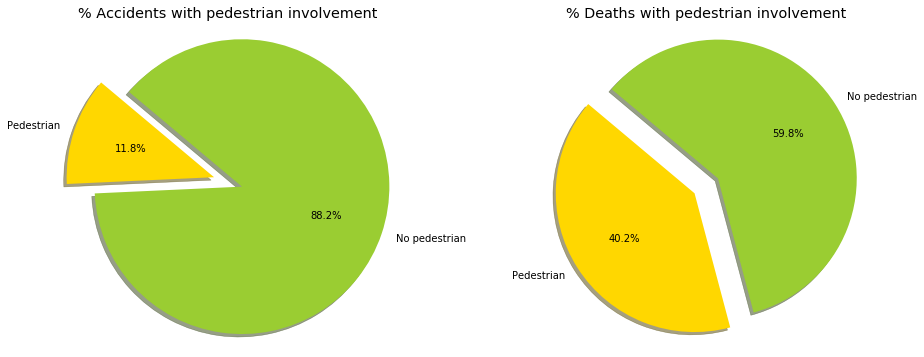

In [68]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['Pedestrian', 'No pedestrian']
ped_acc = len(accidents[accidents['is_role_pedestrian'] == 1])
no_ped_acc = number_total_accidents - len(accidents[accidents['is_role_pedestrian'] == 1])
sizes_acc = [ped_acc, no_ped_acc]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents with pedestrian involvement")
#labels = list(mediate_cause_df.index)
ped_dea = len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)])
no_ped_dea = number_total_deaths - len(accidents[(accidents['is_role_pedestrian'] == 1) & (accidents['#_deaths'] > 0)])
sizes = [ped_dea, no_ped_dea]
explode = (0.1, 0.1,)
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths with pedestrian involvement")
plt.show()

### The field 'pedestrian_cause' explains how th pedestrian is involved in the accident. 
#### First, in how many accidents there was a pedestrian involved?

Number of accidents with pedestrain:  10267
Percentage over total:  11.84 %
Number of deaths in accidents with pedestrain:  100
Percentage over total:  41.49 %
Percentage of accidents with pedestrian of unknown cause:  31.89 %
Percentage of accidents with pedestrains where the pedestrian is not reponsible:  25.91 %
Rest of causes and its average: 


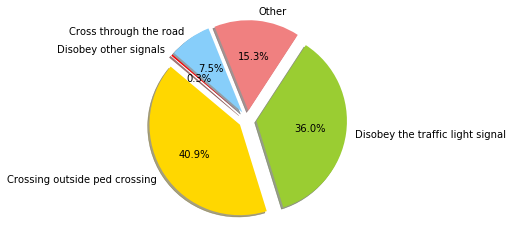

In [69]:
# pedestrian = pd.DataFrame(accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause')['incident_#'].count())
# pedestrian.columns = ['number_accidents']
# pedestrian['number_deaths'] = accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause')['#_deaths'].sum().values
pedestrian = accidents[accidents['is_role_pedestrian'] ==1].groupby('pedestrian_cause').agg({'incident_#': 'count', '#_deaths': 'sum'})
pedestrian.columns = ['number_accidents', 'number_deaths']
print("Number of accidents with pedestrain: ", pedestrian['number_accidents'].sum())
print("Percentage over total: ", round((pedestrian['number_accidents'].sum()/number_total_accidents)*100,2),'%')
print("Number of deaths in accidents with pedestrain: ", pedestrian['number_deaths'].sum())
print("Percentage over total: ", round((pedestrian['number_deaths'].sum()/number_total_deaths)*100,2),'%')


print('Percentage of accidents with pedestrian of unknown cause: ',\
      round((pedestrian.at['unknown', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')
print('Percentage of accidents with pedestrains where the pedestrian is not reponsible: ',\
      round((pedestrian.at['No peds fault', 'number_accidents']/pedestrian['number_accidents'].sum())*100, 2), '%')

clean_pedestrian= pedestrian.drop(['unknown', 'No peds fault'])
clean_pedestrian['average_accidents'] = round(clean_pedestrian['number_accidents']/clean_pedestrian['number_accidents'].sum(), 2)*100
clean_pedestrian.sort_values(by='average_accidents', ascending=False, inplace=True)
clean_pedestrian['average_accidents'] = [str(round(x,2)) + '%' for x in clean_pedestrian['average_accidents']]
# print('Out of the ones of known causes where the pedestrian is responsible; What are the causes?',round((pedestrian.drop('unknown').at['No peds fault','incident_#']\
#        /pedestrian.drop('No peds fault')['number_accidents'].sum())*100,2), '%')
#clean_pedestrian.drop('Other')
print("Rest of causes and its average: ")
#clean_pedestrian
labels = list(clean_pedestrian.index)
sizes = list(clean_pedestrian['number_accidents'])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
#plt.show()
plt.savefig('./charts/pedestrian_cause_accidents_2018.png');

## One Final Note

In [70]:
### Despite "Crossing
print("Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round(((1772+1561)/pedestrian['number_accidents'].sum())*100, 2),'%')
print("Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'\
and 'Disobey the traffic light' is :", round((52/pedestrian['number_deaths'].sum())*100, 2),'%')

Percentage of pedestrian accidents where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 32.46 %
Percentage of deaths in a pedestrian accident where the cause is 'Crossing outside ped corssing'and 'Disobey the traffic light' is : 52.0 %


# Causes

In [71]:
##Aboutcauses

is_cause_list = [x for x in accidents.columns if 'is_cause' in x]
cause_df = pd.DataFrame(index=is_cause_list)
for ix in is_cause_list:
    cause_df.at[ix, 'number_accidents'] = accidents.loc[accidents[ix] == 1]['incident_#'].count()
    cause_df.at[ix, 'number_deaths'] = accidents.loc[accidents[ix] == 1]['#_deaths'].sum()
cause_df.index = [x[9:].lower() for x in cause_df.index]
cause_df.drop('non_existing',inplace=True)
#mediate_cause_df = cause_df.drop('no mediate cause')
cause_df

,number_accidents,number_deaths
signals_damaged,41.0,0.0
unknown,21.0,0.0
objects or animals on the road,15.0,0.0
no mediate cause,81712.0,198.0
weather,14.0,0.0
speeding,871.0,37.0
drunkdriving,3279.0,6.0
road_damaged,762.0,1.0
dui,138.0,4.0


In [72]:
the_rest = 0
for idx in cause_df.index:
    if cause_df.at[idx,'number_accidents'] <100:
        the_rest += cause_df.at[idx,'number_accidents']
cause_df.at['the_rest', 'number_accidents'] = the_rest
mediate_cause_df = cause_df.loc[['speeding', 'drunkdriving', 'dui', 'the_rest']]

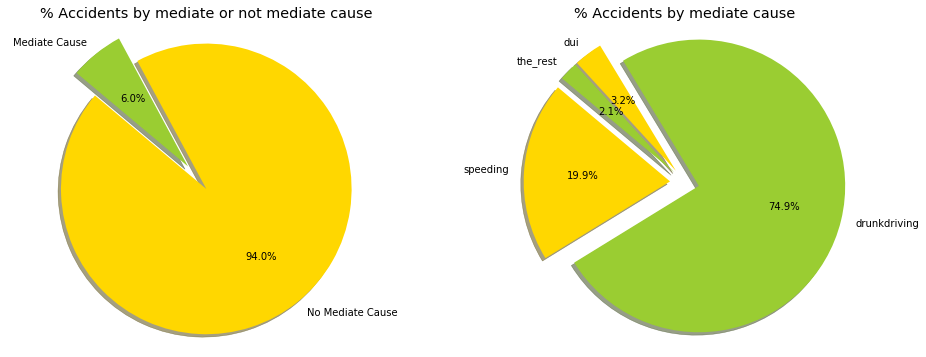

In [73]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['No Mediate Cause', 'Mediate Cause']
no_med_cause_acc = cause_df.at['no mediate cause', 'number_accidents']
no_med_cause_dea = cause_df.at['no mediate cause', 'number_deaths']
sizes_acc = [no_med_cause_acc/number_total_accidents, (cause_df['number_accidents'].sum() - no_med_cause_acc)/number_total_accidents]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by mediate or not mediate cause")
labels = list(mediate_cause_df.index)
sizes = list(mediate_cause_df['number_accidents'])
explode = tuple([0.1] * len(mediate_cause_df))
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Accidents by mediate cause")
plt.show()

# Vehicles

In [74]:
is_vehicle_list = [x for x in accidents.columns if 'is_vehicle' in x][0:9]
#is_vehicle_list = [x.strip('_')[-1] for x in is_vehicle_list]
#motorbike
print("Number of accidents with motorbikes: ", len(accidents[accidents['is_vehicle_Motorbike'] == 1]))
print("Percentage of accidents with motorbikes: ",
      round((len(accidents[accidents['is_vehicle_Motorbike'] == 1])/number_total_accidents)*100, 2), '%')

Number of accidents with motorbikes:  42140
Percentage of accidents with motorbikes:  48.61 %


In [75]:
df_vehicle = pd.DataFrame(index=is_vehicle_list)
for item in is_vehicle_list:
    df_vehicle.at[item,'number_deceased'] = accidents[accidents[item] == 1]['#_deaths'].sum()
    df_vehicle.at[item,'number_accidents'] = accidents[accidents[item] == 1]['incident_#'].count()
    df_vehicle.at[item,'avg_accidents_per_vehicle'] = (accidents[accidents[item] == 1]['incident_#'].count()/number_total_accidents )*100
    df_vehicle.at[item, 'avg_deaths_per_vehicle'] = (accidents[accidents[item] == 1]['#_deaths'].sum()/number_total_deaths)*100
df_vehicle.index = [x.split('_')[-1] for x in df_vehicle.index]
df_vehicle

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle
unknown,0.0,7590.0,8.755739,0.000000
Motorbike,143.0,42140.0,48.612233,59.336100
Car,53.0,16732.0,19.301848,21.991701
Moped,9.0,9557.0,11.024848,3.734440
Van,5.0,2267.0,2.615186,2.074689
Other vehicles,16.0,3306.0,3.813765,6.639004
Bicycle,10.0,5144.0,5.934061,4.149378
Bus,17.0,3128.0,3.608426,7.053942
Truck,14.0,492.0,0.567566,5.809129


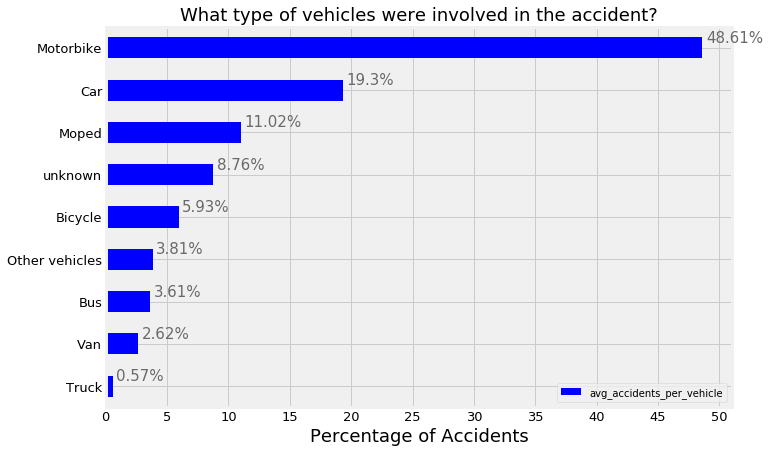

In [76]:
ax = df_vehicle.sort_values('avg_accidents_per_vehicle').plot(kind='barh', y = 'avg_accidents_per_vehicle',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved in the accident?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()


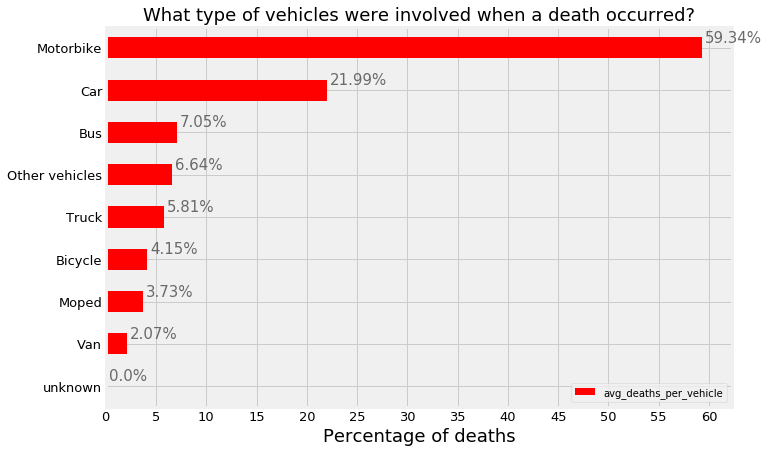

In [77]:

ax = df_vehicle.sort_values('avg_deaths_per_vehicle').plot(kind='barh', y = 'avg_deaths_per_vehicle', figsize=(10,7),
                                        color="red", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of vehicles were involved when a death occurred?", fontsize=18)
ax.set_xlabel("Percentage of deaths", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

In [78]:
# I will compared the values for the most interested vehicles:
#     Motorbikes, Cars, Moped,Bus and Truck
interesting =['Motorbike', 'Car', 'Bus', 'Truck', 'Moped', 'Bicycle']
not_interesting = [x for x in df_vehicle.index if x not in interesting]
df_vehicle_short = df_vehicle.drop(not_interesting)
df_vehicle_short

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle
Motorbike,143.0,42140.0,48.612233,59.336100
Car,53.0,16732.0,19.301848,21.991701
Moped,9.0,9557.0,11.024848,3.734440
Bicycle,10.0,5144.0,5.934061,4.149378
Bus,17.0,3128.0,3.608426,7.053942
Truck,14.0,492.0,0.567566,5.809129


/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


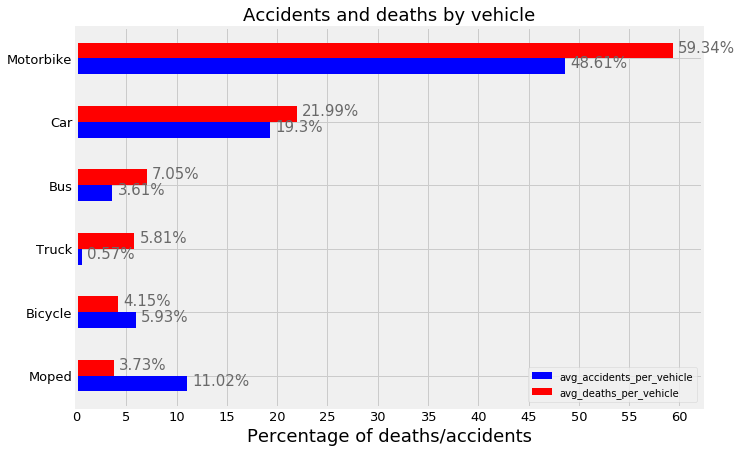

In [79]:
ax = df_vehicle_short.sort_values('avg_deaths_per_vehicle').plot(kind='barh', y = ['avg_accidents_per_vehicle','avg_deaths_per_vehicle'], figsize=(10,7),
                                        color=["blue","red"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Accidents and deaths by vehicle", fontsize=18)
ax.set_xlabel("Percentage of deaths/accidents", fontsize=18);
ax.set_xticks([x for x in range(0,65,5)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.5, i.get_y()+.1, \
            str(round(i.get_width(), 2))+'%', fontsize=15,
color='dimgrey')
ax.legend(loc=4);

# # invert for largest on top 
# #ax.invert_yaxis()

# Finally, what is the deadliest vehicle?
## Let's divide de amount of deaths in accidents where such a vehicle took part by the number of accidents in which the vehicle was involved

In [80]:
df_vehicle['deadly_ratio'] =(df_vehicle['number_deceased']/df_vehicle['number_accidents'])*100
df_vehicle

,number_deceased,number_accidents,avg_accidents_per_vehicle,avg_deaths_per_vehicle,deadly_ratio
unknown,0.0,7590.0,8.755739,0.000000,0.000000
Motorbike,143.0,42140.0,48.612233,59.336100,0.339345
Car,53.0,16732.0,19.301848,21.991701,0.316758
Moped,9.0,9557.0,11.024848,3.734440,0.094172
Van,5.0,2267.0,2.615186,2.074689,0.220556
Other vehicles,16.0,3306.0,3.813765,6.639004,0.483969
Bicycle,10.0,5144.0,5.934061,4.149378,0.194401
Bus,17.0,3128.0,3.608426,7.053942,0.543478
Truck,14.0,492.0,0.567566,5.809129,2.845528


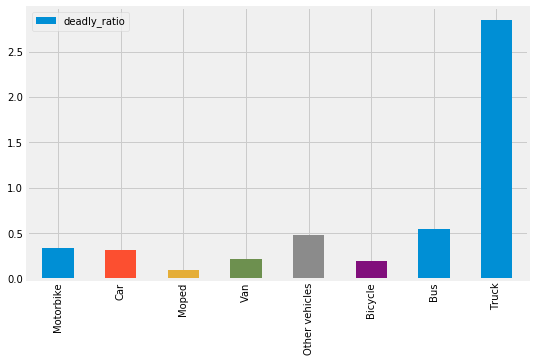

In [81]:
df_vehicle.drop('unknown').plot(kind='bar', y='deadly_ratio', figsize=(8,5));

# Analyzing Driver's Age

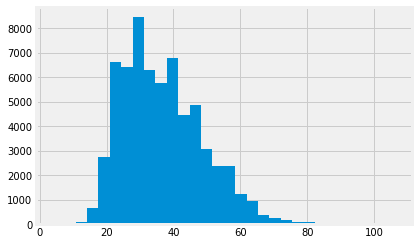

In [82]:
age_driver_known =accidents[accidents['age_driver'] !=0]
plt.hist(age_driver_known['age_driver'], bins=30);

25 Rectangle(xy=(25, 0), width=5, height=10614, angle=0)


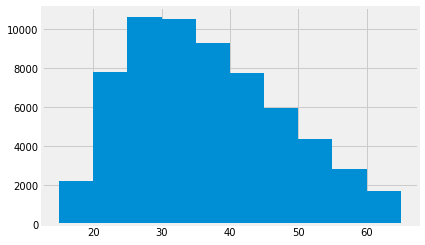

In [83]:
bins = [x for x in range(15,70,5)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(age_driver_known['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

# Driver's gender

In [84]:
# What about the gender of the driver?

print("Men driving some vehicle in the accident: ",len(accidents[accidents['is_male_driver'] >0]),"\n")
print("Women driving any vehicle in the accident: ",len(accidents[accidents['is_female_driver'] > 0]), '\n')
print("Only men driving in the accident: ",len(accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]), "\n")
print("Only women driving in the accident: ", len(accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]))

Men driving some vehicle in the accident:  47888 

Women driving any vehicle in the accident:  18747 

Only men driving in the accident:  45549 

Only women driving in the accident:  16408


In [85]:
only_man = accidents[(accidents['is_male_driver'] > 0) & (accidents['is_female_driver'] == 0)]
only_woman = accidents[(accidents['is_female_driver'] > 0) & (accidents['is_male_driver'] == 0)]
only_man.sample()

,index,#_deaths,amount_vehicles_involved,amount_victims,day_month,district,hour_day,incident_#,lat,latitude,...,is_license_class_motorbike_license,is_license_class_van_license,is_license_class_bus_license,is_license_class_taxis_ambulances_license,is_license_class_moped_permit,is_license_class_non-existing,is_license_class_no_license,senority_avg,dates,street_crossing
1953,1953,0,2,1,22.0,Sants-Montjuïc,18.0,2010S005724,0.0,41.362376,...,0,0,0,0,1,1,0,1.5,August/22/2010,0


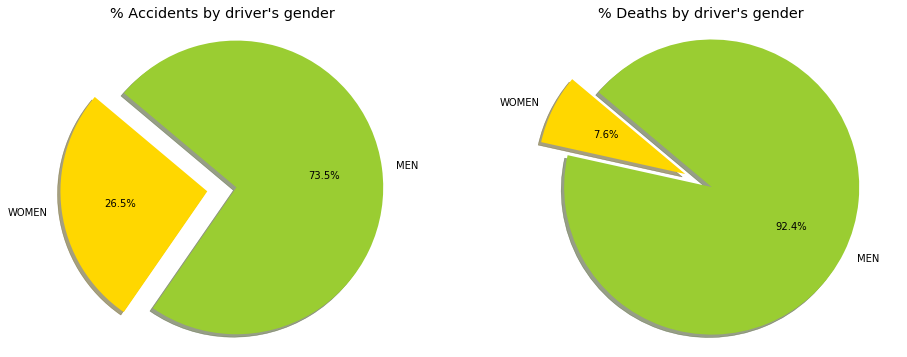

In [86]:
##Average accidents
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
labels = ['WOMEN', 'MEN']
sizes_acc = [(only_woman['incident_#'].count()/number_total_accidents)*100, (only_man['incident_#'].count()/number_total_accidents)*100]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0.1,)  # explode 1st slice

# Plot
ax1.pie(sizes_acc, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.set_title("% Accidents by driver's gender")
sizes_de = [(only_woman['#_deaths'].sum()/number_total_deaths)*100, (only_man['#_deaths'].sum()/number_total_deaths)*100]
ax2.pie(sizes_de, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
ax2.set_title("% Deaths by driver's gender")
plt.show()

## DRIVERS AGE BY GENDER

In [87]:
age_driver_woman = age_driver_known[age_driver_known['is_male_driver'] == 0]
age_driver_man = age_driver_known[age_driver_known['is_female_driver'] == 0]

25 Rectangle(xy=(25, 0), width=5, height=3312, angle=0)


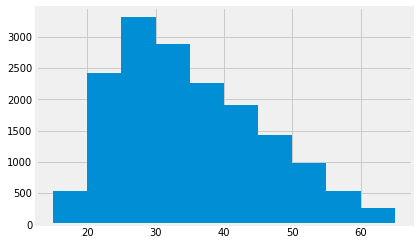

In [88]:
bins = [x for x in range(15,70,5)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(age_driver_woman['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

30 Rectangle(xy=(30, 0), width=5, height=7203, angle=0)


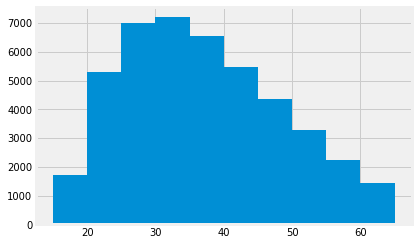

In [89]:
bins = [x for x in range(15,70,5)]
fig = plt.figure()
ax = fig.add_subplot(111)
n,b,p=ax.hist(age_driver_man['age_driver'], bins=bins)

# Finding your point
for y in range(0,len(n)):
    elem = n[y]
    if elem == n.max():
     break
else:   # ideally this should never be tripped
    y = none
print(b[y], p[y])

# TYPE ACCIDENT

In [90]:
type_columns = [x for x in accidents.columns if 'type' in x][-11::]
type_df = pd.DataFrame(index=type_columns)
for col in type_columns:
    type_df.at[col,'number_deaths'] = accidents[accidents[col] == 1]['#_deaths'].sum()
    type_df.at[col,'number_accidents'] = accidents[accidents[col] == 1]['incident_#'].count()
type_df.index = [x[8::] for x in type_df.index]
type_df

,number_deaths,number_accidents
lateral_collision,77.0,37113.0
rear-end_collision,12.0,21299.0
frontal-lateral_collision,56.0,16915.0
run_over,103.0,10605.0
fall--motorcycle,29.0,8786.0
crash_into_stationary,47.0,7109.0
multiple_rear-end_collision,0.0,3054.0
Other_types,10.0,2608.0
fall_inside_vehicle,1.0,2318.0
frontal_collision,7.0,1154.0


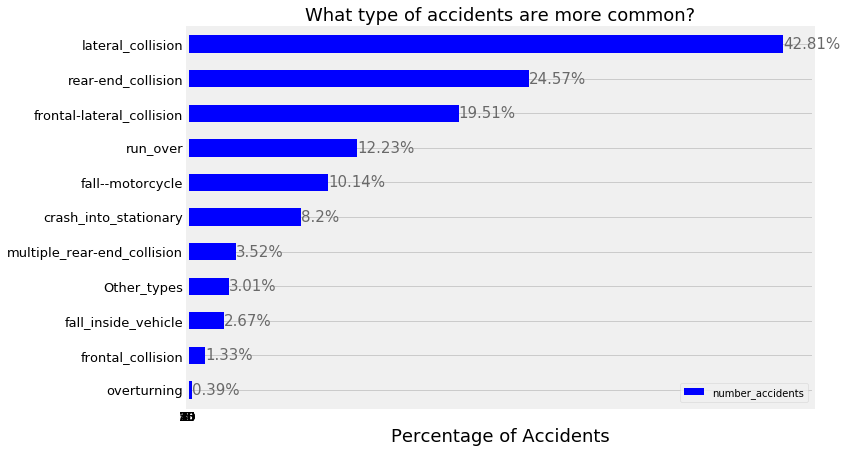

In [91]:
ax = type_df.plot(kind='barh', y = 'number_accidents',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of accidents are more common?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/number_total_accidents)*100,2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
ax.invert_yaxis()


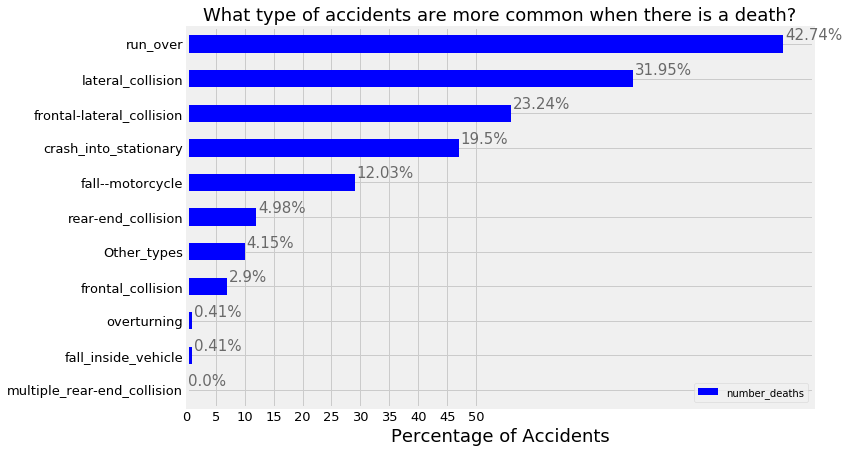

In [92]:
ax = type_df.sort_values('number_deaths').plot(kind='barh', y = 'number_deaths',figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What type of accidents are more common when there is a death?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35,40, 45,50])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/number_total_deaths)*100,2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()


# Vehicles: model, brand, color, license_class and snority

In [93]:
list_vehicles = ['vehicle_model', 'vehicle_brand', "vehicle_color", 'license_class', 'senority_license']
##model does not offer information: there are over 40000 models


## Brand

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


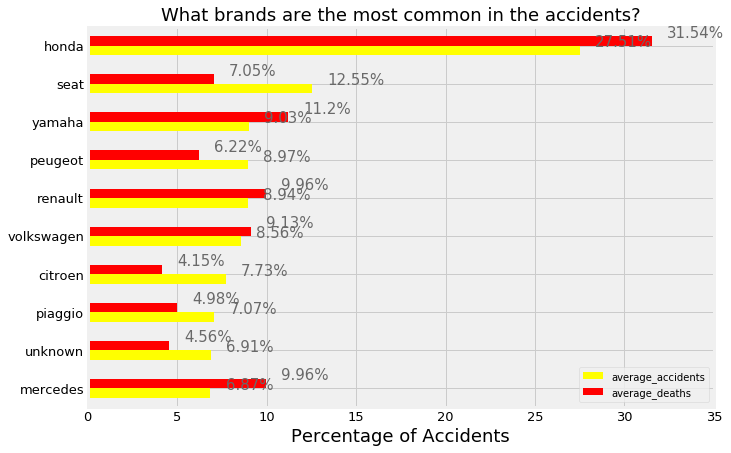

In [94]:
brand_list = [x for x in accidents.columns if 'is_vehicle_brand' in x]
brand_df = pd.DataFrame(index=brand_list)


for brand in brand_list:
    brand_df.at[brand,'number_accidents'] = accidents[accidents[brand] ==1]['incident_#'].count()
    brand_df.at[brand,'number_deaths'] = accidents[accidents[brand] ==1]['#_deaths'].sum()
brand_df
brand_df.index=[x[17::] for x in brand_list]
brand_df['average_accidents'] = (brand_df['number_accidents']/number_total_accidents)*100
brand_df['average_deaths'] = (brand_df['number_deaths']/number_total_deaths)*100
ax = brand_df.sort_values('number_accidents')[-10:].plot(kind='barh', y = ['average_accidents','average_deaths'],figsize=(10,7),
                                        color=["yellow","red"], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("What brands are the most common in the accidents?", fontsize=18)
ax.set_xlabel("Percentage of Accidents", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25,30,35])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.85, i.get_y()+.22, \
            str(round(i.get_width(),2))+'%', fontsize=15, color='dimgrey')
ax.legend(loc=4);
# invert for largest on top 
#ax.invert_yaxis()

In [95]:
#let's see if the fact that honda and yamaha arae up there is because they are the most common brand for mtorcycles
print('Accidents with Motorbikes: ', len(accidents[(accidents['is_vehicle_Motorbike'] ==1)]))
print("How many Hondas? ", brand_df.at['honda', 'number_accidents'])
print("How many Yamahas? ", brand_df.at['yamaha', 'number_accidents'])
print("Accidents with Honda Motorbikes: ", accidents[(accidents['is_vehicle_Motorbike'] ==1) & (accidents['is_vehicle_brand_honda'] ==1)]['incident_#'].count(),)
print("Accidents with Yamaha Motorbike: ", accidents[(accidents['is_vehicle_Motorbike'] ==1) & (accidents['is_vehicle_brand_yamaha'] == 1)]['incident_#'].count())

Accidents with Motorbikes:  42140
How many Hondas?  23850.0
How many Yamahas?  7827.0
Accidents with Honda Motorbikes:  19692
Accidents with Yamaha Motorbike:  5974


## Color

In [96]:
accidents['amount_vehicles_involved'].sum()

166757

In [97]:
color_list = [x for x in accidents.columns if 'is_vehicle_color' in x]
summa = 0
for color in color_list:
    summa = summa + accidents[accidents[color]==1]['incident_#'].count()
summa

232737

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


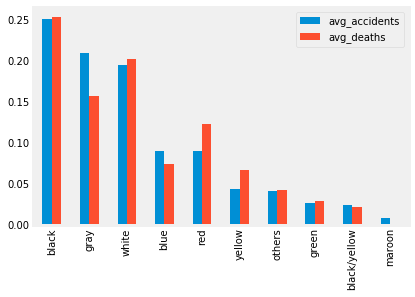

In [98]:
color_list = [x for x in accidents.columns if 'is_vehicle_color' in x]
color_df = pd.DataFrame(index=color_list)
for color in color_list:
    color_df.at[color,'number_accidents'] = accidents[accidents[color] ==1]['incident_#'].count()
    color_df.at[color,'number_deaths'] = accidents[accidents[color] ==1]['#_deaths'].sum()
color_df.index = [x[17:] for x in color_df.index]
color_df.drop('unknown', inplace=True)
color_df['avg_accidents'] = color_df['number_accidents']/color_df['number_accidents'].sum()
color_df['avg_deaths'] = color_df['number_deaths']/color_df['number_deaths'].sum()


color_df.sort_values('number_accidents',ascending=False).head(10).plot(kind='bar', y=['avg_accidents', 'avg_deaths'], secondary_y='number_deaths');

/Users/fcbnyc/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


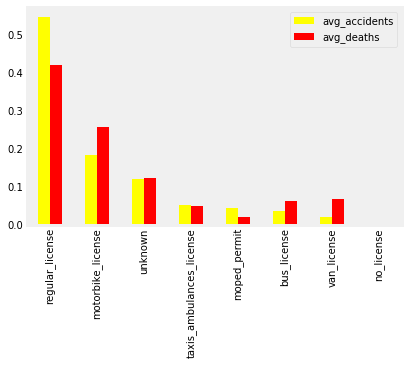

In [99]:
license_list = [x for x in accidents.columns if 'is_license_class' in x]
license_df = pd.DataFrame(index=license_list)
for col in license_list:
    license_df.at[col, 'number_accidents'] = accidents[accidents[col] ==1]['incident_#'].count()
    license_df.at[col,'number_deaths'] = accidents[accidents[col] ==1]['#_deaths'].sum()
license_df.index = [x[17:] for x in license_df.index]
license_df.drop('non-existing',inplace=True)
license_df['avg_accidents'] = license_df['number_accidents']/license_df['number_accidents'].sum()
license_df['avg_deaths'] = license_df['number_deaths']/license_df['number_deaths'].sum()
license_df.sort_values('number_accidents', ascending=False).plot(kind ='bar',y =['avg_accidents', 'avg_deaths'],\
                                                                 secondary_y='number_deaths',\
                                                                 color=['yellow', 'red'])

In [100]:
###seniority: final straw----assuming they are in years

accidents['senority_avg'].describe()

count    86686.000000
mean        15.321652
std         18.146785
min      -2921.000000
25%          7.000000
50%         14.000000
75%         22.000000
max        624.333333
Name: senority_avg, dtype: float64

86686


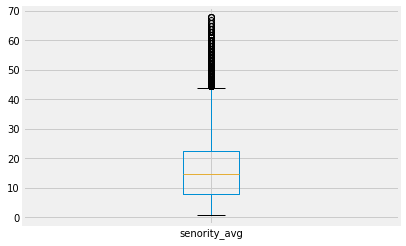

In [101]:
print(len(accidents))
license_df= accidents[(accidents['senority_avg'] >0) & (accidents['senority_avg'] <70)]\
[['senority_avg', 'incident_#', '#_deaths']]
license_death_df = license_df[license_df['#_deaths'] > 0]
license_df.boxplot('senority_avg');

(array([19399., 20801., 19287., 12155.,  6474.,  2914.,  1023.,   479.,
          154.,    36.]),
 array([ 1. ,  7.7, 14.4, 21.1, 27.8, 34.5, 41.2, 47.9, 54.6, 61.3, 68. ]),
 <a list of 10 Patch objects>)

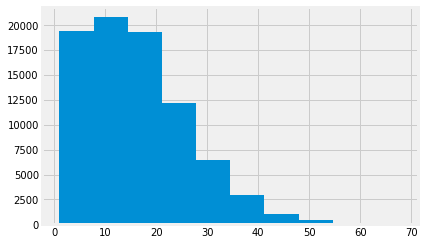

In [102]:
plt.hist(license_df['senority_avg'])

(array([64., 61., 30., 26., 21., 12.,  6.,  4.,  1.,  3.]),
 array([ 1. ,  7.1, 13.2, 19.3, 25.4, 31.5, 37.6, 43.7, 49.8, 55.9, 62. ]),
 <a list of 10 Patch objects>)

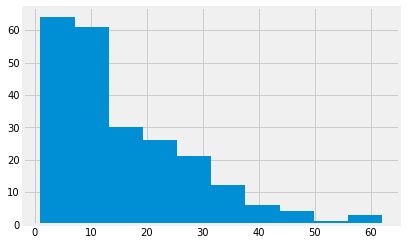

In [103]:
plt.hist(license_death_df['senority_avg'])